# Lending Club Case Study

**Problem Statement**

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.

Aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

**Business Objectives**
- Use EDA to understand how consumer attributes and loan attributes influence the tendency of default
- Aim of this case study is to use EDA to identify such applicants.
- Understand the driving factors behind loan default i.e. the variables which are strong indicators of default

### Importing data

In [1]:
# Importing the libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style  # to import all styles
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset and check the shape and first five rows
loan_data = pd.read_csv('loan.csv')
print(loan_data.shape)
loan_data.head()

(39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## Data Handling and Cleaning

Objective of the below mentioned steps is to ensure that we handle missing data and incorrect / invalid data appropriately. Below is the list of steps we followed.

- **Missing Values & Unique values**
    1. Identify the columns which have all null values and drop them
    2. Identify the columns which have more than 50% of null values & drop them
    3. Checking if all rows have same value for a particular column and drop that columns
    4. Checking if all rows have distinct values for a particular column and drop them if we feel those are not useful for our analysis
    5. Handle the other missing values as appropriate depending on the data and how we think they may affect our analysis either by dropping them or imputing them or keeping them if we feel that they don't affect our analysis
    6. Dropping other columns which we feel may not be useful for our analysis after looking at the data and the dictionary
    
- **Incorrect data types**
    1. Cleaning certain values
    2. Clean & convert entire column    

In [3]:
#Trying to check the datatypes of all the columns of the dataframe & high level summary of null values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


It looks like it didn't display the information that we expected as the number of columns seem to be high

#### Missing & Unique values treatment

**1. Dropping the columns with all null values**

In [4]:
loan_data.dropna(axis='columns',how='all',inplace=True)
loan_data.shape

(39717, 57)

Almost 50% of columns are dropped which have all null values and we can see that there are now 57 columns remaining

**2. Identifying and Dropping columns with more than 50% of null values**

In [5]:
# Checking the percentage of null values in each column
columnsNullPercentage = round(((loan_data.isnull().sum())/len(loan_data.id))*100)

# Filtering the columns with more than 50% null values
columnsNullPercentage[columnsNullPercentage > 50]

mths_since_last_delinq    65.0
mths_since_last_record    93.0
next_pymnt_d              97.0
dtype: float64

Columns 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq' have more than 50% of its values as null and hence dropping them straight away

In [6]:
# Dropping the columns which have more than 50% null values
loan_data.drop(columnsNullPercentage[columnsNullPercentage > 50].index, axis=1, inplace=True)
loan_data.shape

(39717, 54)

Now we have 54 columns remaining

**3. Dropping columns which have only one unique value for all the rows**

In [7]:
# Finding columns with only one unique value among them
#loan_data.nunique().sort_values(ascending=True)
loan_data.nunique()[loan_data.nunique() == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

- As we can see that columns like 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','tax_liens' have only one unique value
- Hence dropping such columns as they will not impact our analysis

In [8]:
#loan_data = loan_data.loc[:,loan_data.nunique() > 1]
loan_data.drop(loan_data.nunique()[loan_data.nunique() == 1].index, axis=1, inplace=True)
loan_data.shape

(39717, 45)

Now we have 45 columns remaining

**4. Dropping columns which have all disctinct values**

In [9]:
# Finding columns with all distinct values
loan_data.nunique()[loan_data.nunique() == len(loan_data)]

id           39717
member_id    39717
url          39717
dtype: int64

 - Columns like id, member_id and url have all disctinct values. Id and member id are unique identifiers and url is also the one which is used to access the loan application record
 - Hence dropping columns member_id , url and keeping id column

In [10]:
loan_data.drop(columns=['member_id','url'], inplace=True)
loan_data.shape

(39717, 43)

Now we have 43 columns remaining

**5. Checking columns with more number of null values**

In [11]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0].sort_values(ascending=False)

desc                    12940
emp_title                2459
emp_length               1075
pub_rec_bankruptcies      697
last_pymnt_d               71
revol_util                 50
title                      11
last_credit_pull_d          2
dtype: int64

In [12]:
#Looking at the data once to see how to handle the null values
pd.set_option('display.max_columns', None)
loan_data.head(5)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                       NaN  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                       NaN  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00   5863.155187          5833.84   
1          4       0.00           0.00   1008.710000          1008.71   
2         10       0.00           0.00   3005.666844          3005.67   
3         37       0.00           0.00  12231.890000         12231.89   
4         38     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   
3                     0.00       Jan-15           357.48             Apr-16   
4                     0.00       May-16            67.79             May-16   

   pub_rec_bankruptcies  
0                  

Looking at the data, we could see that columns desc and title are completely artbitrary and title column seems to have some junk data like dates. Hence dropping those columns as they won't be useful for our analysis

In [13]:
loan_data.drop(columns=['desc','title'], inplace=True)
loan_data.shape

(39717, 41)

Now we have 41 columns remaining

In [14]:
#Checking the counts of null values again
loan_data.isnull().sum()[loan_data.isnull().sum() > 0].sort_values(ascending=False)

emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
last_credit_pull_d         2
dtype: int64

In [15]:
len(loan_data[(loan_data['emp_title'].isnull()) & (loan_data['emp_length'].isnull())])

1019

Below are our observations on what we think can be done to fix the above missing values

- Imputing the values
    - emp_title - 2459 missing values - Imputing this with unknown value to indicate that emp_title is missing
    - emp_length - 1075 missing values - We feel this can be imputed with 0 years if the records don't have both emp_title and emp_length. We have 1019 such records. Rest of them can be dropped during our analysis
    - pub_rec_bankruptcies - 697 missing values - This indicates number of public bankruptcies. Either the rows can be dropped / they can be imputed with 0.0 assuming there were none when the value is missing

- Dropping columns
    - last_credit_pull_d - 2 missing values - As per the data dictionary, 'last_credit_pull_d'is the most recent month LC pulled credit for this loan. Not very relevant to analysis so we can discard this one.
- Dropping records - This will be done only when we use this columns in our analysis
    - last_pymnt_d - 71 missing values
    - revol_util - 50 missing values




Filling nulls in emp_title column with 'unknown' string

In [16]:
# Replacing nulls in emp_title with unknown value and checking null count after replacing
loan_data['emp_title'].fillna('unknown',inplace=True)
loan_data['emp_title'].isnull().sum()

0

Replacing emp_length as 0 years if both emp_title and emp_length are missing

In [17]:
# Replacing emp_length with 0 if both emp_title and emp_length are missing
mask = (loan_data['emp_length'].isnull()) & (loan_data['emp_title'] == 'unknown')
loan_data.loc[mask, 'emp_length'] = '0 years'
loan_data['emp_length'].isnull().sum()

56

Replacing pub_rec_bankruptcies column with 0.0 which happens to be mode of it as well

In [18]:
#Checking value counts for pub_rec_bankruptcies column
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [19]:
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0])
loan_data['pub_rec_bankruptcies'].isnull().sum()

0

In [20]:
# Dropping last_credit_pull_d as it is not relevenat to our analysis
loan_data.drop(columns='last_credit_pull_d',inplace=True)
loan_data.shape

(39717, 40)

**6. Dropping columns which may not be relevant for our analysis**

In [21]:
loan_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                   unknown  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                   unknown  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card    860xx         AZ  27.65            0           Jan-85   
1             car    309xx         GA   1.00            0           Apr-99   
2  small_business    606xx         IL   8.72            0           Nov-01   
3           other    917xx         CA  20.00            0           Feb-96   
4           other    972xx         OR  17.94            0           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   
1               5         3        0       1687      9.40%          4   
2               2         2        0       2956     98.50%         10   
3               1        10        0       5598        21%         37   
4               0        15        0      27783     53.90%         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  
0       Jan-15           171.62                   0.0  
1       Apr-13           119.66                   0.0  
2       Jun-14           649.91                   0.0  
3       Jan-15           357.48                   0.0  
4       May-16            67.79                   0.0

After looking on the data, and checking the data dictionary we can conclude

1. 'collection_recovery_fee' is post charge off collection fee, not relevent so we can discard it.
2. 'zip_code' column has last two characters as masked, so dropping that column as it may not be useful for our analysis
3. 'funded_amnt' and 'funded_amnt_inv' look similar as 'Loan_amnt', so we can discard it ?
4. 'out_prncp' and 'out_prncp_inv' are basically same so we can remove 'out_prncp_inv'?
5. 'total_pymnt'and 'total_pymnt_inv' are mostly same. Can we delete 'total_pymnt_inv' ?


**Verifying further to see if columns mentioned above have similar values**

In [22]:
print('Total number of rows are: ', len(loan_data))

Total number of rows are:  39717


In [23]:
# loan_amnt, funded_amnt and funded_amnt_inv mostly seem to be similar. Checking the actual counts of same values
print('Count of loan_amnt Equals funded_amnt is: ', len(loan_data[(loan_data['loan_amnt'] == loan_data['funded_amnt'])]))
print('Count of loan_amnt Equals funded_amnt_inv is: ', len(loan_data[(loan_data['loan_amnt'] == loan_data['funded_amnt_inv'])]))

Count of loan_amnt Equals funded_amnt is:  37868
Count of loan_amnt Equals funded_amnt_inv is:  19528


In [24]:
# out_prncp and out_prncp_inv mostly seem to be similar. Checking the actual counts of same values
print('Count of out_prncp Equals out_prncp_inv is: ', len(loan_data[(loan_data['out_prncp'] == loan_data['out_prncp_inv'])]))

Count of out_prncp Equals out_prncp_inv is:  39163


In [25]:
# total_pymnt and total_pymnt_inv mostly seem to be similar. Checking the actual counts of same values
print('Count of total_pymnt Equals total_pymnt_inv is: ', len(loan_data[(loan_data['total_pymnt'] == loan_data['total_pymnt_inv'])]))

Count of total_pymnt Equals total_pymnt_inv is:  4360


Based on looking at high level comparison of data, we can conclude that below columns can be dropped as they have more or less similar values when compared with other columns

1. funded_amnt as it has more similarity with loan_amnt
2. out_prncp as it has more similarity with out_prncp_inv

So we will be dropping 'collection_recovery_fee', 'zip_code', 'funded_amnt' and 'out_prncp'

In [26]:
# Delete the columns which are not required for analysis
loan_data.drop(columns=['collection_recovery_fee','zip_code', 'funded_amnt' ,'out_prncp'],inplace=True)
loan_data.shape

(39717, 36)

We now have 36 columns remaining

#### Cleaning the data / Data Correction

In [27]:
# Creating a copy of the dataset
cleaned_data = loan_data.copy()

In [28]:
cleaned_data.head()

id  loan_amnt  funded_amnt_inv        term int_rate  installment  \
0  1077501       5000           4975.0   36 months   10.65%       162.87   
1  1077430       2500           2500.0   60 months   15.27%        59.83   
2  1077175       2400           2400.0   36 months   15.96%        84.33   
3  1076863      10000          10000.0   36 months   13.49%       339.31   
4  1075358       3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length home_ownership  \
0     B        B2                   unknown  10+ years           RENT   
1     C        C4                     Ryder   < 1 year           RENT   
2     C        C5                   unknown  10+ years           RENT   
3     C        C1       AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5  University Medical Group     1 year           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
4     80000.0     Source Verified  Dec-11      Current           other   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   
3         CA  20.00            0           Feb-96               1        10   
4         OR  17.94            0           Jan-96               0        15   

   pub_rec  revol_bal revol_util  total_acc  out_prncp_inv   total_pymnt  \
0        0      13648     83.70%          9           0.00   5863.155187   
1        0       1687      9.40%          4           0.00   1008.710000   
2        0       2956     98.50%         10           0.00   3005.666844   
3        0       5598        21%         37           0.00  12231.890000   
4        0      27783     53.90%         38         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  
0        0.00       Jan-15           171.62                   0.0  
1      117.08       Apr-13           119.66                   0.0  
2        0.00       Jun-14           649.91                   0.0  
3        0.00       Jan-15           357.48                   0.0  
4        0.00       May-16            67.79                   0.0

In [29]:
# removing the % sign from the int_rate and revol_util column
cleaned_data['int_rate'] = cleaned_data['int_rate'].str.rstrip('%').astype('float')
cleaned_data['revol_util'] = cleaned_data['revol_util'].str.rstrip('%').astype('float')

In [30]:
# removing the months from the term column
cleaned_data['term'] = cleaned_data['term'].str.lstrip(' ').str.rstrip('months').astype('int')

In [31]:
# Verifying the value counts for emp_length for formatting it
cleaned_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0 years      1019
Name: emp_length, dtype: int64

In [32]:
#Replacing < 1 with 0.5 and removing string characters like +, year, years
cleaned_data['emp_length'] = cleaned_data['emp_length'].str.replace('< 1', '0.5')
cleaned_data['emp_length'] = cleaned_data['emp_length'].str.replace('+','').str.replace('years','').str.replace('year','')
cleaned_data['emp_length'].value_counts()

10      8879
0.5     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
0       1019
Name: emp_length, dtype: int64

In [33]:
#Converting the data type of emp_length to float
cleaned_data['emp_length'] = cleaned_data['emp_length'].astype('float')

**Extracting year and month for issue_d**

In [34]:
cleaned_data.issue_d = pd.to_datetime(cleaned_data.issue_d, format='%b-%y')
cleaned_data['issue_d_year'] = cleaned_data['issue_d'].dt.year
cleaned_data['issue_d_month'] = cleaned_data['issue_d'].dt.month

In [35]:
cleaned_data.head()

id  loan_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0  1077501       5000           4975.0    36     10.65       162.87     B   
1  1077430       2500           2500.0    60     15.27        59.83     C   
2  1077175       2400           2400.0    36     15.96        84.33     C   
3  1076863      10000          10000.0    36     13.49       339.31     C   
4  1075358       3000           3000.0    60     12.69        67.79     B   

  sub_grade                 emp_title  emp_length home_ownership  annual_inc  \
0        B2                   unknown        10.0           RENT     24000.0   
1        C4                     Ryder         0.5           RENT     30000.0   
2        C5                   unknown        10.0           RENT     12252.0   
3        C1       AIR RESOURCES BOARD        10.0           RENT     49200.0   
4        B5  University Medical Group         1.0           RENT     80000.0   

  verification_status    issue_d  loan_status         purpose addr_state  \
0            Verified 2011-12-01   Fully Paid     credit_card         AZ   
1     Source Verified 2011-12-01  Charged Off             car         GA   
2        Not Verified 2011-12-01   Fully Paid  small_business         IL   
3     Source Verified 2011-12-01   Fully Paid           other         CA   
4     Source Verified 2011-12-01      Current           other         OR   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65            0           Jan-85               1         3        0   
1   1.00            0           Apr-99               5         3        0   
2   8.72            0           Nov-01               2         2        0   
3  20.00            0           Feb-96               1        10        0   
4  17.94            0           Jan-96               0        15        0   

   revol_bal  revol_util  total_acc  out_prncp_inv   total_pymnt  \
0      13648        83.7          9           0.00   5863.155187   
1       1687         9.4          4           0.00   1008.710000   
2       2956        98.5         10           0.00   3005.666844   
3       5598        21.0         37           0.00  12231.890000   
4      27783        53.9         38         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  \
0        0.00       Jan-15           171.62                   0.0   
1      117.08       Apr-13           119.66                   0.0   
2        0.00       Jun-14           649.91                   0.0   
3        0.00       Jan-15           357.48                   0.0   
4        0.00       May-16            67.79                   0.0   

   issue_d_year  issue_d_month  
0          2011             12  
1          2011             12  
2          2011             12  
3          2011             12  
4          2011             12

**Sanity Checks**

In [36]:
#Verifying if funded amount is less than or equal to loan amount or not
len((cleaned_data[cleaned_data['loan_amnt'] >= cleaned_data['funded_amnt_inv']]))

39717

In [37]:
# Verifying if interest rate is greater than zero or not
cleaned_data.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

## Univariate Analysis

In [38]:
# intializing style for plots sns
sns.set(style="whitegrid")
sns.set(style="ticks", color_codes=True)
#sns.set_palette("husl")
# setting the size of plots and text size
#sns.set(rc={'figure.figsize': (6, 4)})
sns.set_context("paper", font_scale=1.5)

In [39]:
#Creating a copy of data
final_data = cleaned_data.copy()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   loan_amnt             39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_title             39717 non-null  object        
 9   emp_length            39661 non-null  float64       
 10  home_ownership        39717 non-null  object        
 11  annual_inc            39717 non-null  float64       
 12  verification_status   39717 non-null  object        
 13  issue_d         

**Analyzing the loan_status value counts as it is the target variable**

In [40]:
final_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**Removing data with loan_status as Current**

In [41]:
# Filtering the data for only fully paid and charged off as data with status as 'current' might not help our analysis
# to determine the variables which influence risky applicants
final_data = final_data[(final_data['loan_status'] == 'Fully Paid') | (final_data['loan_status'] == 'Charged Off')]
final_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [42]:
#Checking the percentage of loan_status counts
final_data['loan_status'].value_counts() * 100 / len(final_data['loan_status'])

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

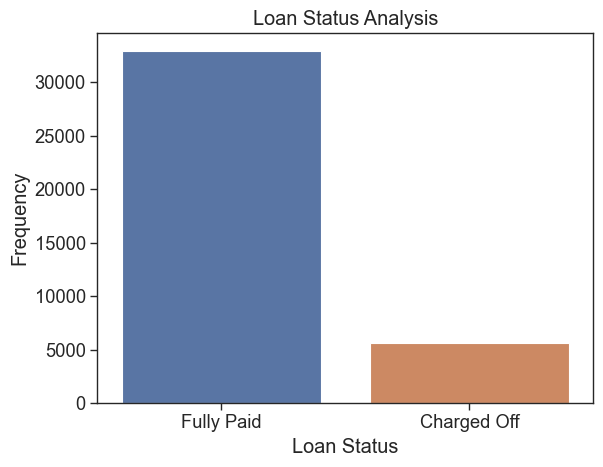

In [43]:
#Plotting a bar chart for the remaining value counts of loan status
#(final_data['loan_status'].value_counts() * 100 / len(final_data['loan_status'])).plot.bar()
sns.countplot(data=final_data, x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Loan Status Analysis')
plt.show()

**85% of the data seems to be fully paid and only 15% of the data is charged off**

**Outliers analysis using boxplots**

Verifying the loan_amnt values to identify outliers for different loan statuses as loan_status is the target variable

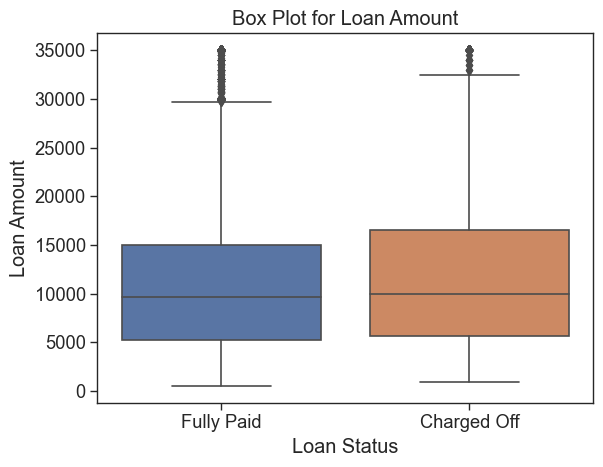

In [44]:
#Plot box plot for loan amounts to identify outliers
sns.boxplot(data=final_data, x='loan_status', y='loan_amnt')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Box Plot for Loan Amount')
plt.show()

Verifying 90th and 95th percentiles of loan_amnt data to get a better idea of outliers

In [45]:
#pd.DataFrame.describe?

In [46]:
loan_amnt_summary_data = final_data.groupby(by='loan_status')['loan_amnt'].describe(percentiles=[.25,.5,.75,0.9,0.95,0.98])
loan_amnt_summary_data

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5627.0  12104.385108  8085.732038  900.0  5600.0  10000.0   
Fully Paid   32950.0  10866.455994  7199.629493  500.0  5200.0   9600.0   

                 75%      90%      95%      98%      max  
loan_status                                               
Charged Off  16500.0  25000.0  27300.0  35000.0  35000.0  
Fully Paid   15000.0  21000.0  25000.0  30000.0  35000.0

In [47]:
loan_amnt_summary_data = loan_amnt_summary_data.assign(IQR=loan_amnt_summary_data['75%'] - loan_amnt_summary_data['25%'])
loan_amnt_summary_data = loan_amnt_summary_data.assign(UF = loan_amnt_summary_data['75%'] + (1.5 * loan_amnt_summary_data['IQR'] ))
loan_amnt_summary_data

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5627.0  12104.385108  8085.732038  900.0  5600.0  10000.0   
Fully Paid   32950.0  10866.455994  7199.629493  500.0  5200.0   9600.0   

                 75%      90%      95%      98%      max      IQR       UF  
loan_status                                                                 
Charged Off  16500.0  25000.0  27300.0  35000.0  35000.0  10900.0  32850.0  
Fully Paid   15000.0  21000.0  25000.0  30000.0  35000.0   9800.0  29700.0

**Checking for outliers in annual_inc**

In [48]:
annual_inc_summary_data = final_data.groupby(by='loan_status')['annual_inc'].describe(percentiles=[.25,.5,.75,0.9,0.95,0.98])
annual_inc_summary_data

count          mean           std     min       25%      50%  \
loan_status                                                                   
Charged Off   5627.0  62427.298034  47776.014188  4080.0  37000.00  53000.0   
Fully Paid   32950.0  69862.503328  66562.246521  4000.0  41132.75  60000.0   

                 75%       90%       95%        98%        max  
loan_status                                                     
Charged Off  75000.0  103020.0  129697.2  171483.84  1250000.0  
Fully Paid   84000.0  118000.0  144000.0  190006.00  6000000.0

In [49]:
annual_inc_summary_data = annual_inc_summary_data.assign(IQR=annual_inc_summary_data['75%'] - annual_inc_summary_data['25%'])
annual_inc_summary_data = annual_inc_summary_data.assign(UF = annual_inc_summary_data['75%'] + (1.5 * annual_inc_summary_data['IQR'] ))
annual_inc_summary_data

count          mean           std     min       25%      50%  \
loan_status                                                                   
Charged Off   5627.0  62427.298034  47776.014188  4080.0  37000.00  53000.0   
Fully Paid   32950.0  69862.503328  66562.246521  4000.0  41132.75  60000.0   

                 75%       90%       95%        98%        max       IQR  \
loan_status                                                                
Charged Off  75000.0  103020.0  129697.2  171483.84  1250000.0  38000.00   
Fully Paid   84000.0  118000.0  144000.0  190006.00  6000000.0  42867.25   

                     UF  
loan_status              
Charged Off  132000.000  
Fully Paid   148300.875

**Removing loan_amnt and annual_inc outliers data for both the loan status using upper fence values**

In [50]:
final_data = final_data[~ ((final_data['loan_status'] == 'Charged Off') & (final_data['loan_amnt'] > 32850))]
final_data = final_data[~ ((final_data['loan_status'] == 'Fully Paid') & (final_data['loan_amnt'] > 29700)) ]

In [51]:
final_data = final_data[~ ((final_data['loan_status'] == 'Charged Off') & (final_data['annual_inc'] > 132000.000))]
final_data = final_data[~ ((final_data['loan_status'] == 'Fully Paid') & (final_data['annual_inc'] > 148300.875)) ]

In [52]:
##Prepare buckets for the annual income & loan amount columns using pd.qcut

final_data['annual_inc_bucket'] = pd.qcut(final_data.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
final_data['loan_amnt_bucket'] = pd.qcut(final_data.loan_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

### Univariate Unordered Categorical Variables

In [53]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36045 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36045 non-null  int64         
 1   loan_amnt             36045 non-null  int64         
 2   funded_amnt_inv       36045 non-null  float64       
 3   term                  36045 non-null  int32         
 4   int_rate              36045 non-null  float64       
 5   installment           36045 non-null  float64       
 6   grade                 36045 non-null  object        
 7   sub_grade             36045 non-null  object        
 8   emp_title             36045 non-null  object        
 9   emp_length            35990 non-null  float64       
 10  home_ownership        36045 non-null  object        
 11  annual_inc            36045 non-null  float64       
 12  verification_status   36045 non-null  object        
 13  issue_d         

**Below are the key unordered categorical variables we have**

**- emp_title**

**- home_ownership**

**- addr_state**

**- purpose**

Over the next few steps, we would be analyzing the impact of each of them on the loan_status

**Splitting data into two sets for each of the loan statuses**

In [54]:
final_data_fully_paid = final_data[final_data['loan_status'] == 'Fully Paid']
final_data_fully_paid.shape

(30810, 40)

In [55]:
final_data_charged_off = final_data[final_data['loan_status'] == 'Charged Off']
final_data_charged_off.shape

(5235, 40)

Observing value counts of each of those unordered categorical variable across both data sets

**Employee Title**

In [56]:
#Observing the value_counts for emp_title
final_data_fully_paid['emp_title'].value_counts()

unknown                         1721
US Army                          105
Bank of America                   85
USAF                              46
IBM                               45
                                ... 
Jessico, Inc.                      1
Avid Technology Inc                1
Hotel & Travel Credit Union        1
rocky media                        1
Evergreen Center                   1
Name: emp_title, Length: 22886, dtype: int64

In [57]:
#Observing the value_counts for emp_title
final_data_charged_off['emp_title'].value_counts()

unknown                    445
Bank of America             20
US Army                     17
Walmart                     13
AT&T                        12
                          ... 
Bonte                        1
Ameritox                     1
kreco electric inc           1
State if Calif               1
Invision Power Services      1
Name: emp_title, Length: 4338, dtype: int64

**Looking at the above value counts, we can conclude that emp_title may not be useful for our analysis**

**Home Ownership**

In [58]:
#Observing the value_counts for home_ownership for fully paid and charged off data
home_ownership_grouped = final_data.groupby(by='home_ownership')['loan_status'].value_counts().reset_index(name='count')
home_ownership_grouped_df = home_ownership_grouped.reset_index(drop=True)
home_ownership_grouped_df

home_ownership  loan_status  count
0       MORTGAGE   Fully Paid  13203
1       MORTGAGE  Charged Off   2070
2           NONE   Fully Paid      3
3          OTHER   Fully Paid     76
4          OTHER  Charged Off     17
5            OWN   Fully Paid   2394
6            OWN  Charged Off    423
7           RENT   Fully Paid  15134
8           RENT  Charged Off   2725

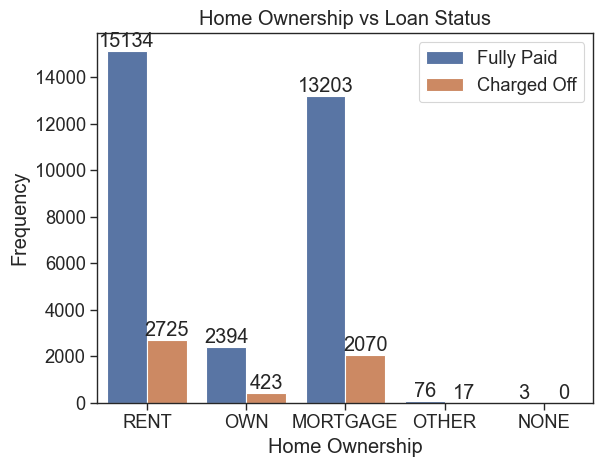

In [59]:
#Plotting bar plot
# sns.barplot(data=home_ownership_grouped_df, x='home_ownership',y='count', hue='loan_status')

#Plotting count plot directly on the final data instead of bar plot on the summary data
ax = sns.countplot(data=final_data, x='home_ownership', hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Home Ownership vs Loan Status')
plt.legend()
plt.show()

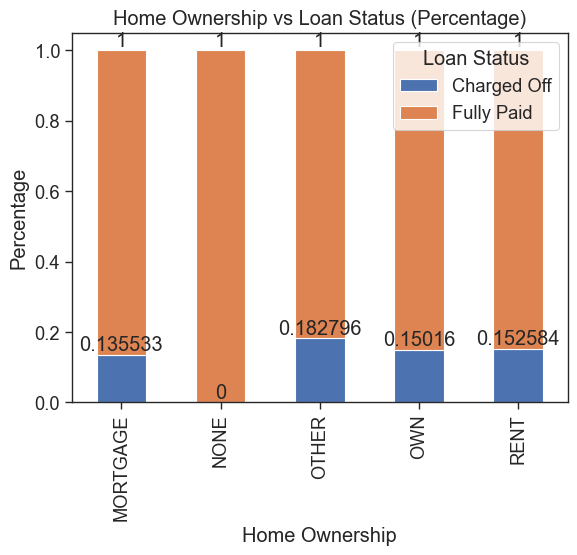

In [60]:
percentage_data = (final_data.groupby(['home_ownership', 'loan_status']).size() / final_data.groupby('home_ownership').size()).unstack().fillna(0)

# Plot the stacked bar plot
ax = percentage_data.plot(kind='bar', stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.title('Home Ownership vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Observations** 
1. More number of loan applicants have Home Ownership as 'RENT' followed by 'MORTGAGEE'.
2. However when we observe charged off data, proportion of 'RENT' is slightly higher 

**Address State**

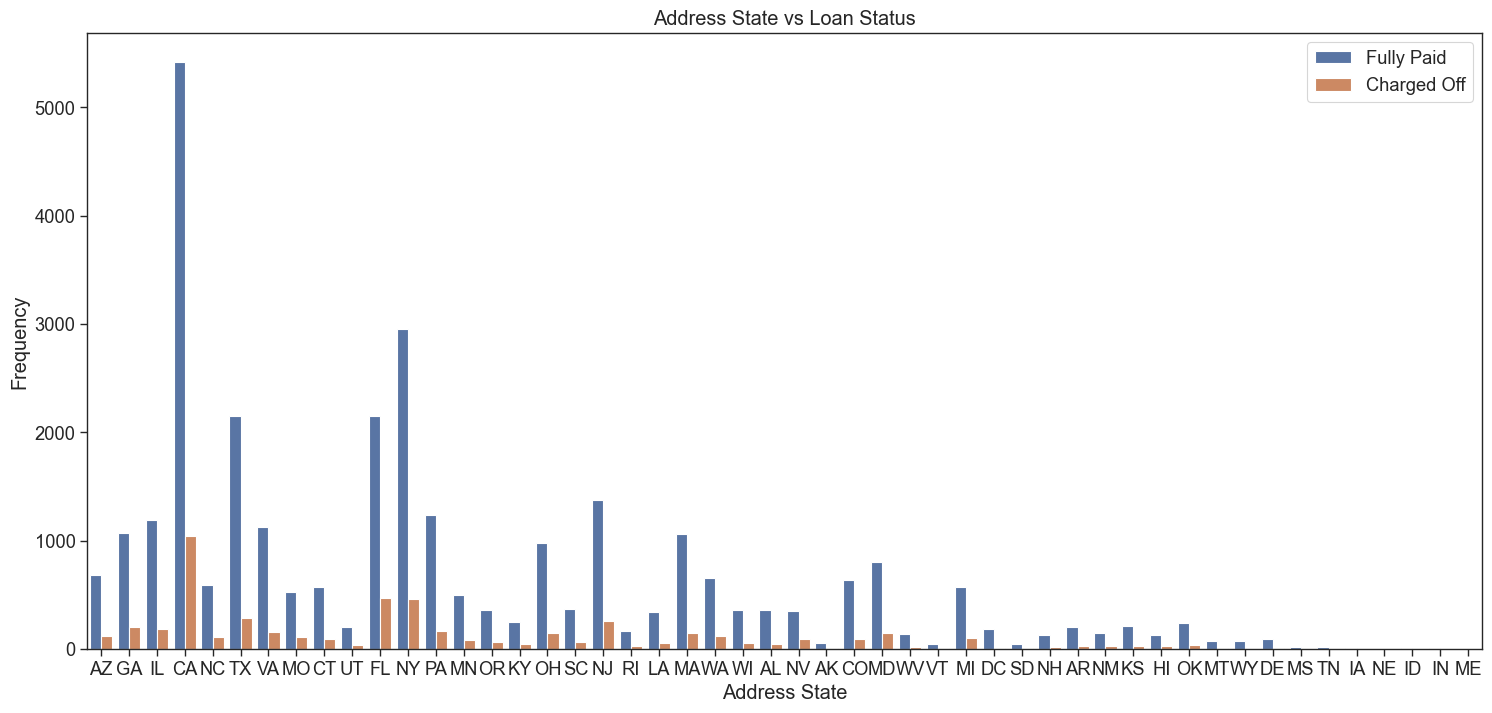

In [61]:
#Plotting count plot for Address state vs loan status
plt.figure(figsize=(18,8))
sns.countplot(data=final_data, x='addr_state', hue='loan_status')
plt.xlabel('Address State')
plt.ylabel('Frequency')
plt.title('Address State vs Loan Status')
plt.legend()
plt.show()

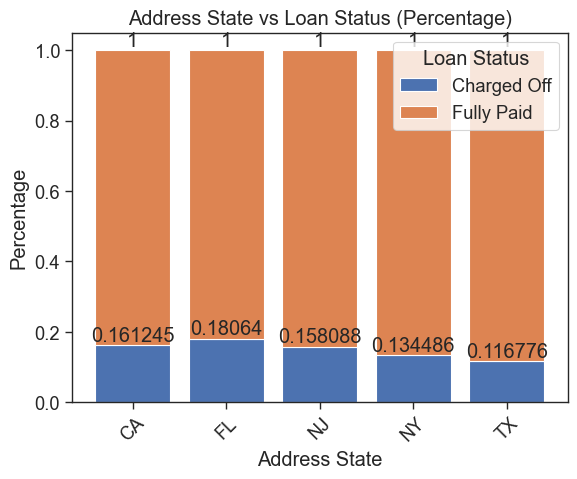

In [62]:
# Calculate the percentage of loan status within each address state
top_5_states_data = final_data[final_data.addr_state.isin(['CA', 'NY','TX','FL','NJ'])]
percentage_data = (top_5_states_data.groupby(['addr_state', 'loan_status']).size() / final_data.groupby('addr_state').size()).unstack().fillna(0)

ax = percentage_data.plot(kind='bar', stacked=True, width=0.8)  # Adjust the width here (0.8 for more space)
for container in ax.containers:
    ax.bar_label(container)
    
tick_positions = range(len(percentage_data))
tick_labels = percentage_data.index
plt.xticks(tick_positions, tick_labels, rotation=45, ha='center')

plt.xlabel('Address State')
plt.ylabel('Percentage')
plt.title('Address State vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Observations**
1. Address states wise, data is mainly coming from CA followed by NY, TX, FL and NJ
2. However proportion of charged off data is more in FL followed by CA

**Purpose**

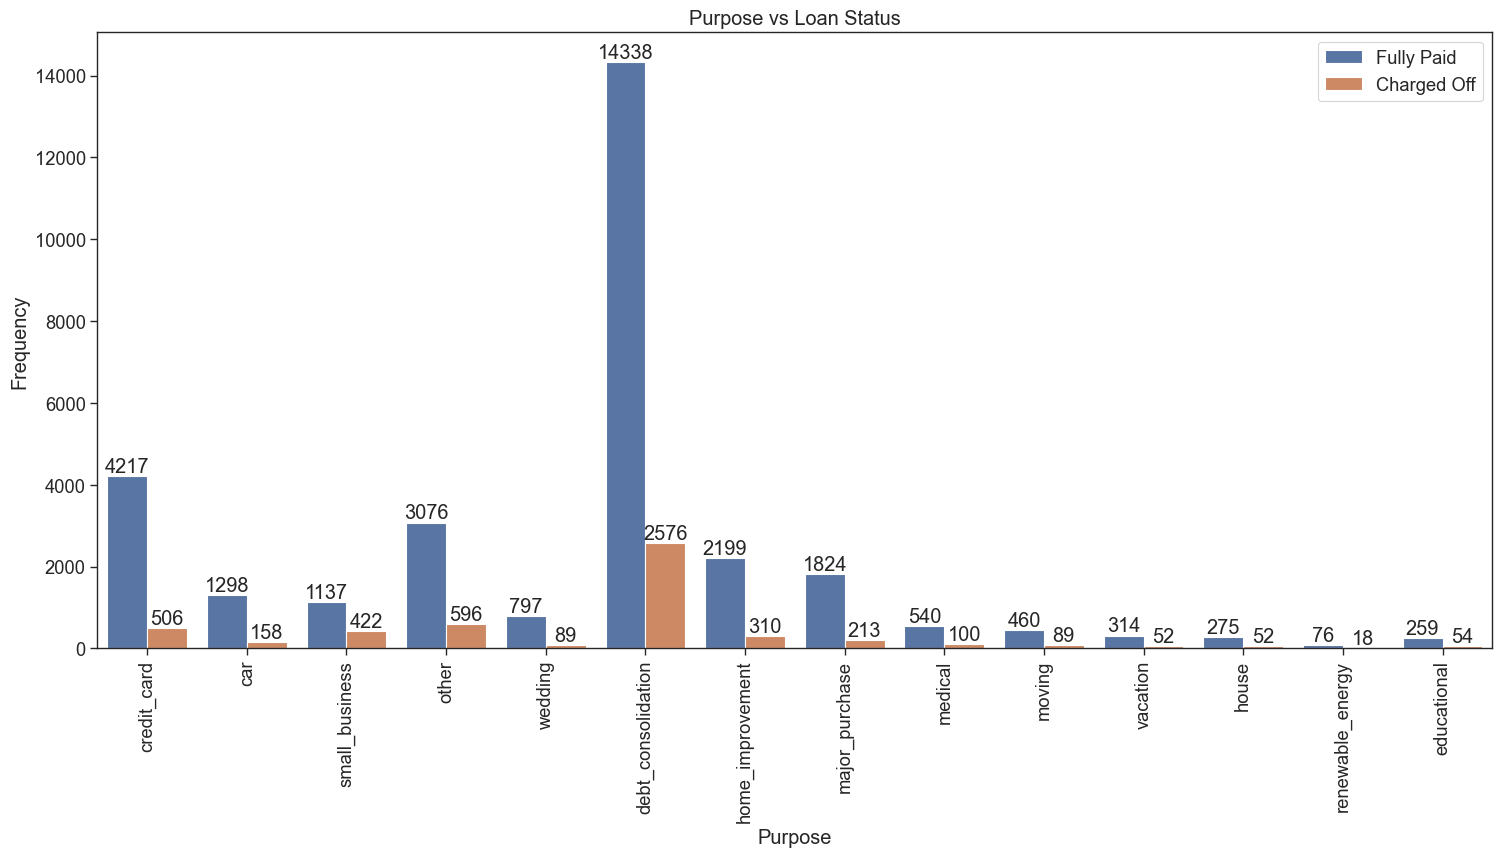

In [63]:
#Plotting count plot to see purpose vs loan status
plt.figure(figsize=(18,8))
ax = sns.countplot(data=final_data, x='purpose', hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Purpose vs Loan Status')
plt.legend()
plt.show()

<Figure size 1800x800 with 0 Axes>

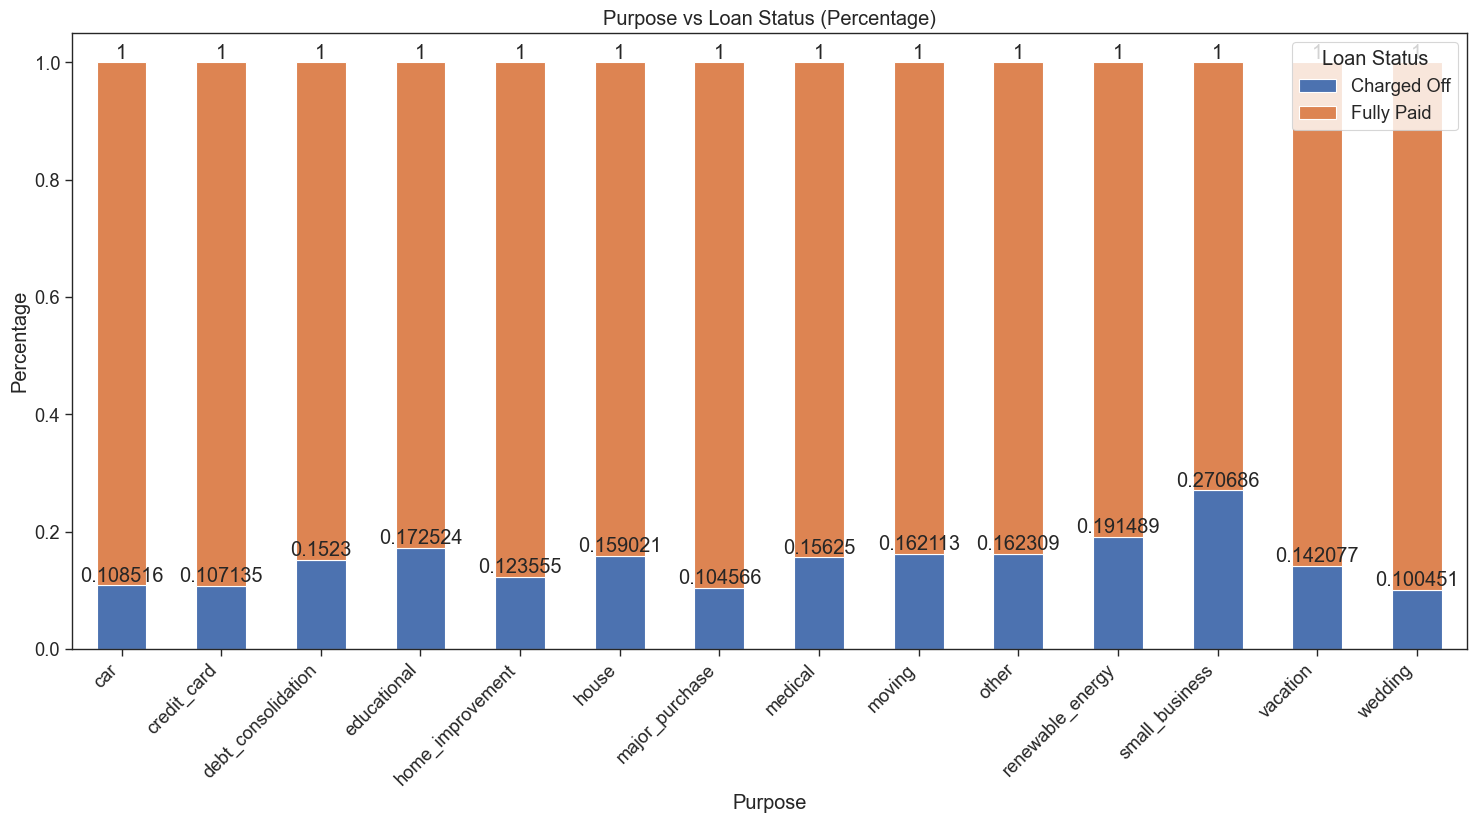

In [64]:
percentage_data = (final_data.groupby(['purpose', 'loan_status']).size() / final_data.groupby('purpose').size()).unstack().fillna(0)

# Create a stacked bar plot to show the percentage of loan status
plt.figure(figsize=(18, 8))
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(18,8))
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.title('Purpose vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations**
1. Most of the loan applicants have given the purpose as 'debt consolidation' distantly followed by 'credit card', 'other' etc.
2. Even though the data for 'small business' is small when compared with 'debt consolidation', close to 40% of the loan applications with purpose as 'small business' have been charged off.

### Ordered Categrical Variables

**Below are the key ordered categorical variables we have**

**- grade**

**- sub_grade**

Over next few steps, we will be analyzing how the grades influence loan status

**Grade**

In [65]:
#Observing the value_counts for grade for fully paid and charged off data
grade_grouped = final_data.groupby(by='grade')['loan_status'].value_counts().reset_index(name='count')
grade_grouped_df = grade_grouped.reset_index(drop=True)
grade_grouped_df

grade  loan_status  count
0      A   Fully Paid   9049
1      A  Charged Off    587
2      B   Fully Paid   9647
3      B  Charged Off   1351
4      C   Fully Paid   6083
5      C  Charged Off   1291
6      D   Fully Paid   3692
7      D  Charged Off   1045
8      E   Fully Paid   1646
9      E  Charged Off    613
10     F   Fully Paid    543
11     F  Charged Off    263
12     G   Fully Paid    150
13     G  Charged Off     85

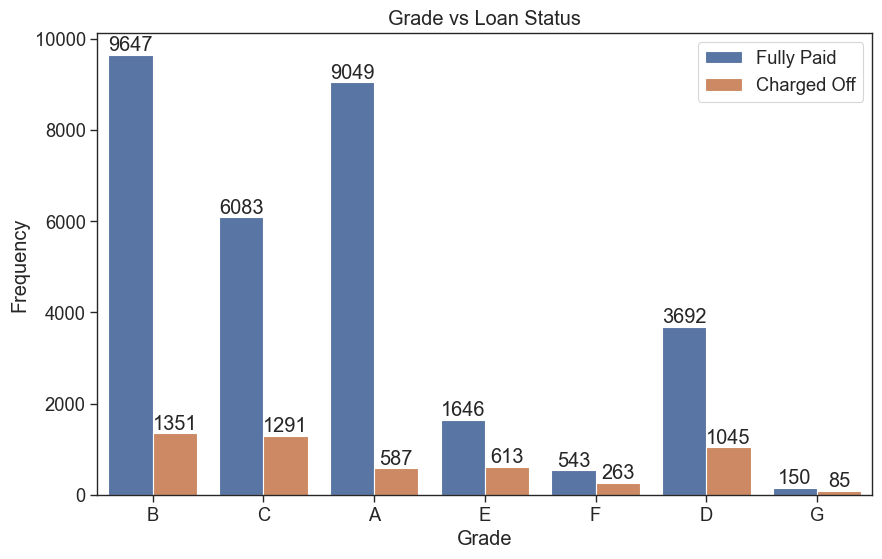

In [66]:
#Plotting bar plot
#sns.barplot(data=grade_grouped_df, x='grade',y='count', hue='loan_status')
#plt.show()

#Plotting count plot directly on the final data instead of bar plot on the summary data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=final_data, x='grade', hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade vs Loan Status')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

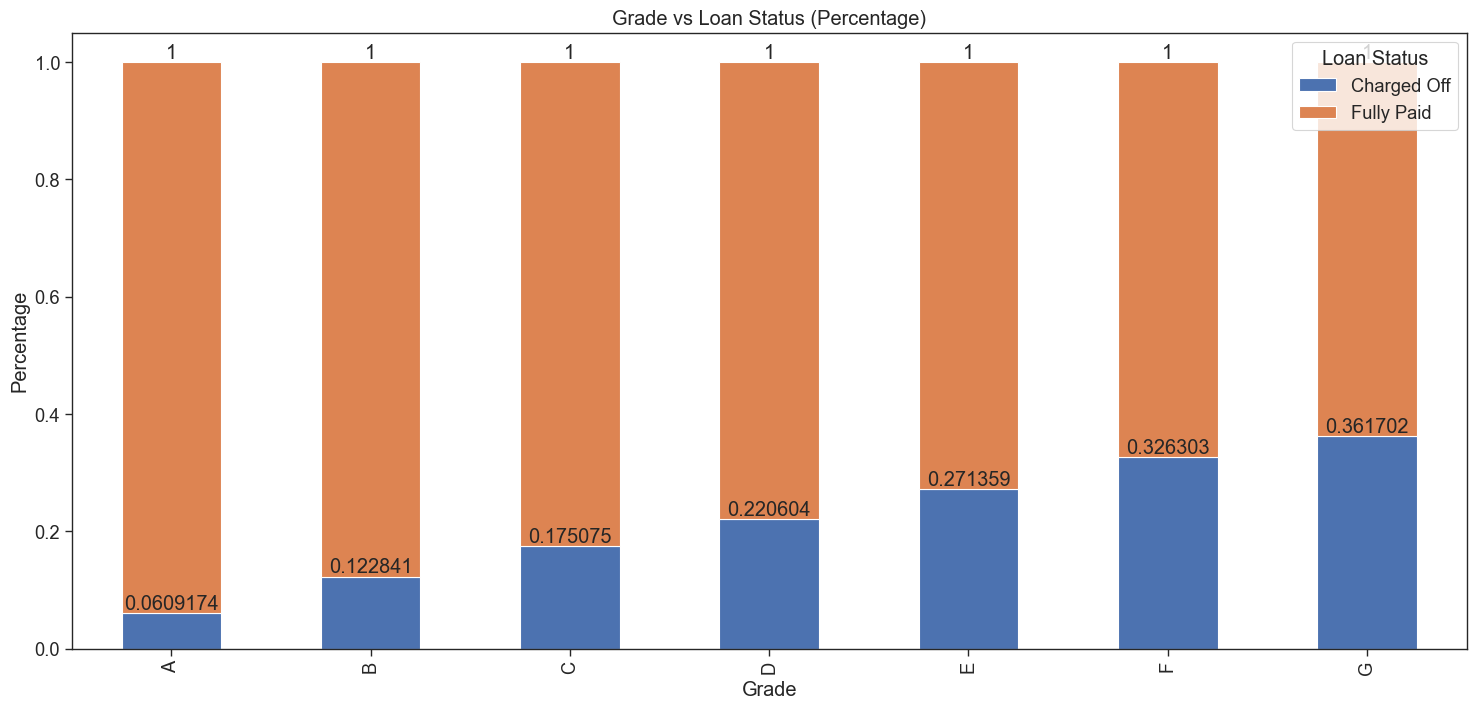

In [67]:
percentage_data = (final_data.groupby(['grade', 'loan_status']).size() / final_data.groupby('grade').size()).unstack().fillna(0)

# Create a stacked bar plot to show the percentage of loan status
plt.figure(figsize=(10, 6))
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(18,8))
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.title('Grade vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Obserations**
1. More number of applicants have grade as 'B' closely followed by 'A' and 'C'
2. Even though the data is small for grades 'E', 'F' and 'G', proportion wise it is increasing as we move from A to G
3. If we look at only A, B and C as more data is from those grades, it is applicants with 'C' grade who are more defaulting followed by 'B' and then 'A'
4. As the Grade is an ordered categorical variable, and risk of the applicant increases from A to G, our results also indicate the same.

**Sub Grade**

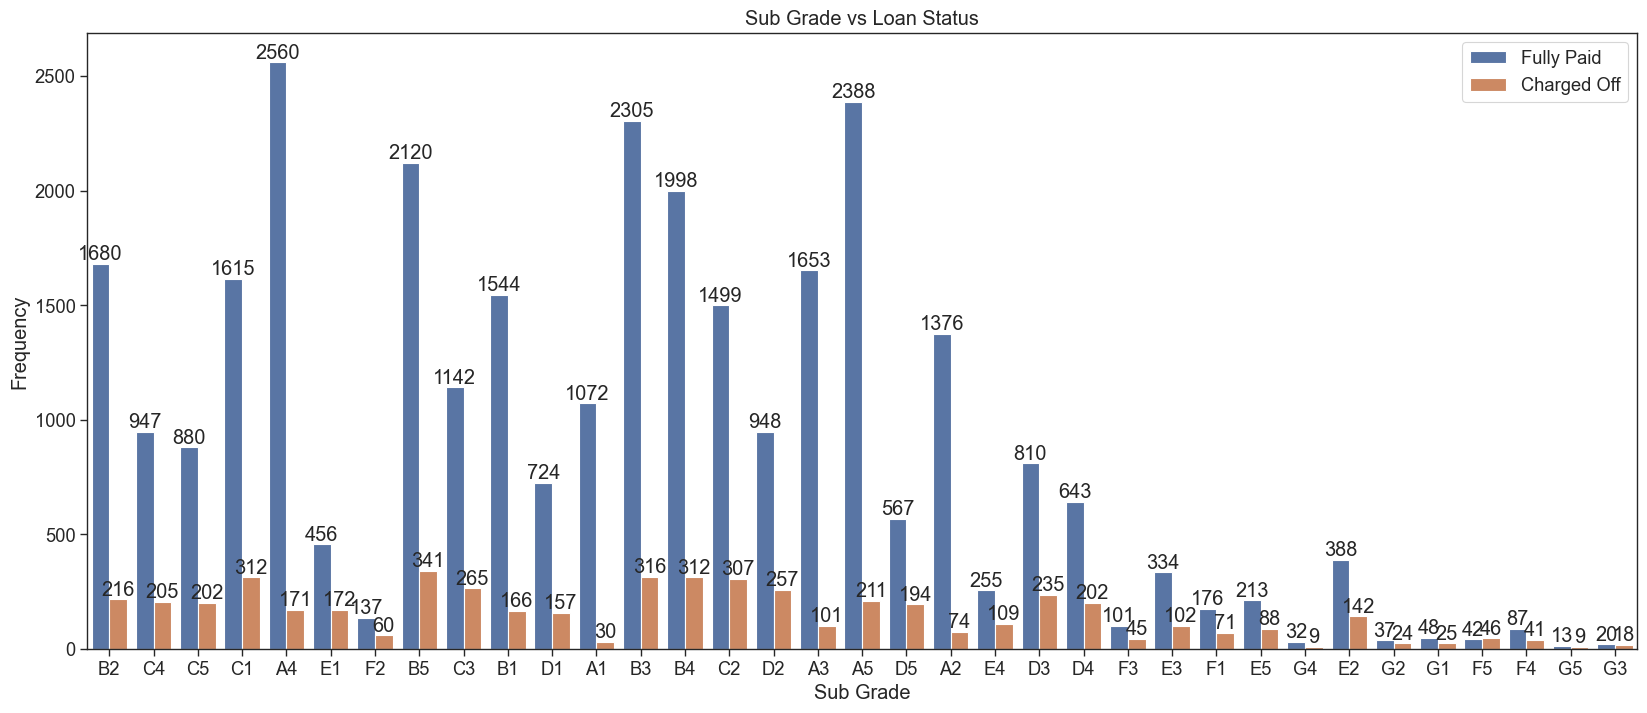

In [68]:
#Plotting count plot for sub grade vs loan status
plt.figure(figsize=(20,8))
ax = sns.countplot(data=final_data, x='sub_grade', hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.title('Sub Grade vs Loan Status')
plt.legend()
plt.show()

<Figure size 2200x800 with 0 Axes>

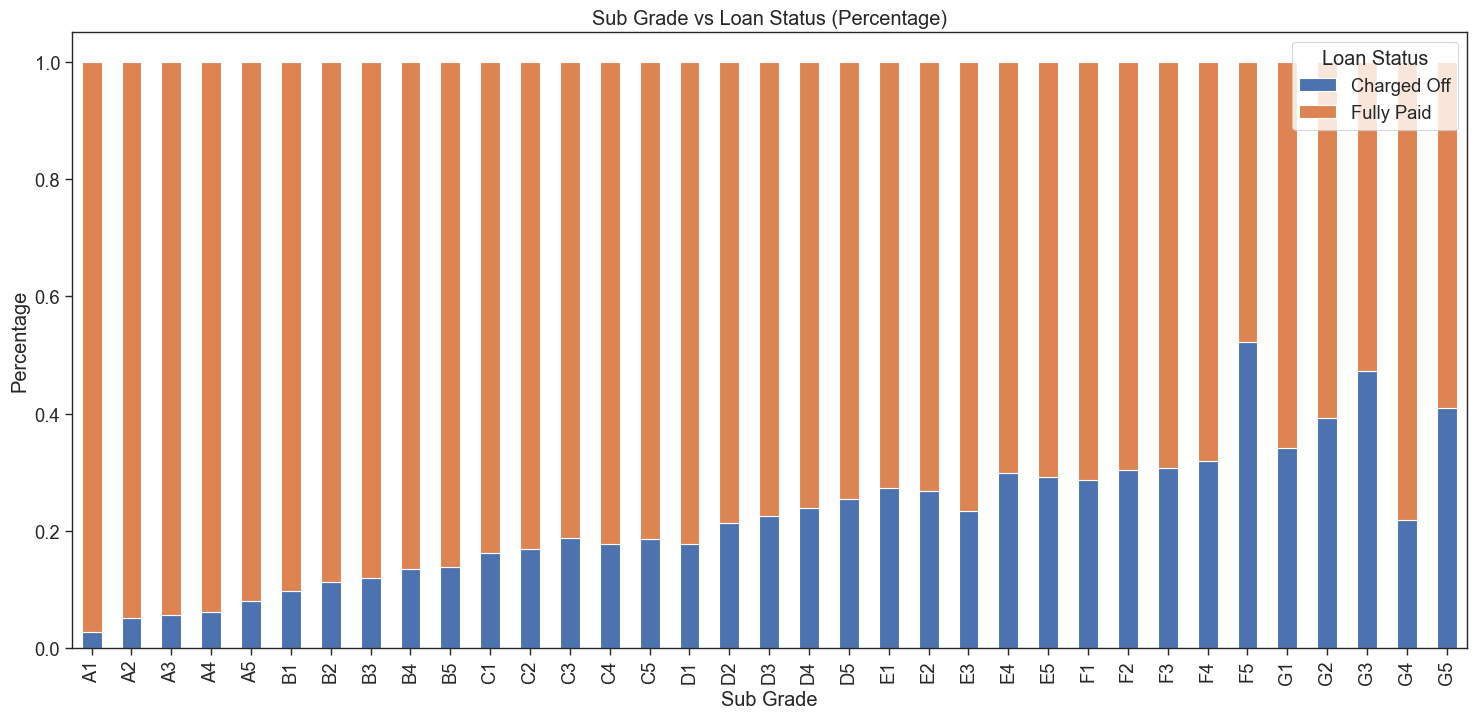

In [69]:
percentage_data = (final_data.groupby(['sub_grade', 'loan_status']).size() / final_data.groupby('sub_grade').size()).unstack().fillna(0)

# Create a stacked bar plot to show the percentage of loan status
plt.figure(figsize=(22, 8))
percentage_data.plot(kind='bar', stacked=True, figsize=(18,8))
plt.xlabel('Sub Grade')
plt.ylabel('Percentage')
plt.title('Sub Grade vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Obserations**
1. More number of applicants have sub grade as 'A4', 'A5' followed by 'B3' and 'B5'
2. Even though the data is small for grades 'E', 'F' and 'G', proportion wise it is increasing as we move from A to G
3. If we look at only A, B and C as more data is from those grades, it is applicants with 'C3' sub grade who are more defaulting followed by 'C4', 'C5'
4. Even these results also vindicate the sub grade significance

### Univariate Analysis of Quantitative / Numeric Variables

Below are the key numeric variables we have

- annual_inc
- emp_length
- int_rate
- term
- pub_rec_bankruptcies
- issue_d_year
- issue_d_month

**Analyzing numeric variables for outliers**

In [70]:
final_data.describe().apply(lambda x: x.apply('{0:.5f}'.format))

id    loan_amnt funded_amnt_inv         term     int_rate  \
count    36045.00000  36045.00000     36045.00000  36045.00000  36045.00000   
mean    672214.41637  10234.58455      9483.53216     41.59367     11.80736   
std     208869.87044   6333.76201      6065.98317     10.14701      3.61886   
min      54734.00000    500.00000         0.00000     36.00000      5.42000   
25%     509359.00000   5000.00000      4960.99508     36.00000      8.90000   
50%     649221.00000   9000.00000      8000.00000     36.00000     11.71000   
75%     822246.00000  14400.00000     12975.00000     36.00000     14.27000   
max    1077501.00000  32400.00000     32350.00000     60.00000     24.40000   

       installment   emp_length    annual_inc          dti  delinq_2yrs  \
count  36045.00000  35990.00000   36045.00000  36045.00000  36045.00000   
mean     301.15052      4.79775   60473.63929     13.42022      0.14551   
std      183.69742      3.50194   27838.39658      6.66362      0.49202   
min       15.69000      0.00000    4000.00000      0.00000      0.00000   
25%      161.93000      2.00000   40000.00000      8.32000      0.00000   
50%      265.18000      4.00000   55000.00000     13.54000      0.00000   
75%      398.52000      8.00000   76000.00000     18.69000      0.00000   
max     1115.55000     10.00000  148080.00000     29.99000     11.00000   

      inq_last_6mths     open_acc      pub_rec     revol_bal   revol_util  \
count    36045.00000  36045.00000  36045.00000   36045.00000  35996.00000   
mean         0.86287      9.14418      0.05726   12117.81026     48.59903   
std          1.06201      4.35533      0.24125   13605.98578     28.29817   
min          0.00000      2.00000      0.00000       0.00000      0.00000   
25%          0.00000      6.00000      0.00000    3502.00000     25.20000   
50%          1.00000      8.00000      0.00000    8368.00000     48.90000   
75%          1.00000     12.00000      0.00000   15886.00000     72.10000   
max          8.00000     44.00000      4.00000  149000.00000     99.90000   

         total_acc out_prncp_inv  total_pymnt total_pymnt_inv total_rec_prncp  \
count  36045.00000   36045.00000  36045.00000     36045.00000     36045.00000   
mean      21.53178       0.00000  10966.98327     10409.15292      8971.22146   
std       11.21149       0.00000   7566.26967      7486.31735      6106.97981   
min        2.00000       0.00000      0.00000         0.00000         0.00000   
25%       13.00000       0.00000   5358.25121      4845.96000      4209.32000   
50%       20.00000       0.00000   9209.05609      8656.18000      7800.00000   
75%       28.00000       0.00000  14998.32854     14347.16000     12000.00000   
max       90.00000       0.00000  45755.22998     45228.96000     31115.81000   

      total_rec_int total_rec_late_fee   recoveries last_pymnt_amnt  \
count   36045.00000        36045.00000  36045.00000     36045.00000   
mean     1909.18948            1.29912     85.27329      2455.47547   
std      1997.27964            6.90647    593.69057      3888.50228   
min         0.00000            0.00000      0.00000         0.00000   
25%       620.06000            0.00000      0.00000       209.76000   
50%      1235.56000            0.00000      0.00000       525.10000   
75%      2458.09000            0.00000      0.00000      3176.46000   
max     19203.69000          166.42971  21810.31000     30107.71000   

      pub_rec_bankruptcies issue_d_year issue_d_month  
count          36045.00000  36045.00000   36045.00000  
mean               0.04414   2010.29416       7.09322  
std                0.20608      0.88433       3.41811  
min                0.00000   2007.00000       1.00000  
25%                0.00000   2010.00000       4.00000  
50%                0.00000   2011.00000       7.00000  
75%                0.00000   2011.00000      10.00000  
max                2.00000   2011.00000      12.00000

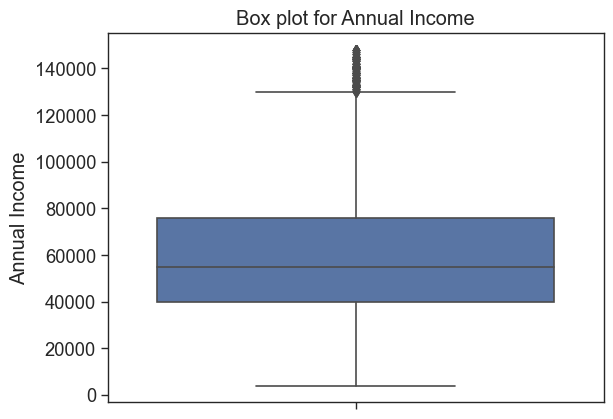

In [71]:
sns.boxplot(data=final_data, y='annual_inc')
plt.ylabel('Annual Income')
plt.title('Box plot for Annual Income')
plt.show()

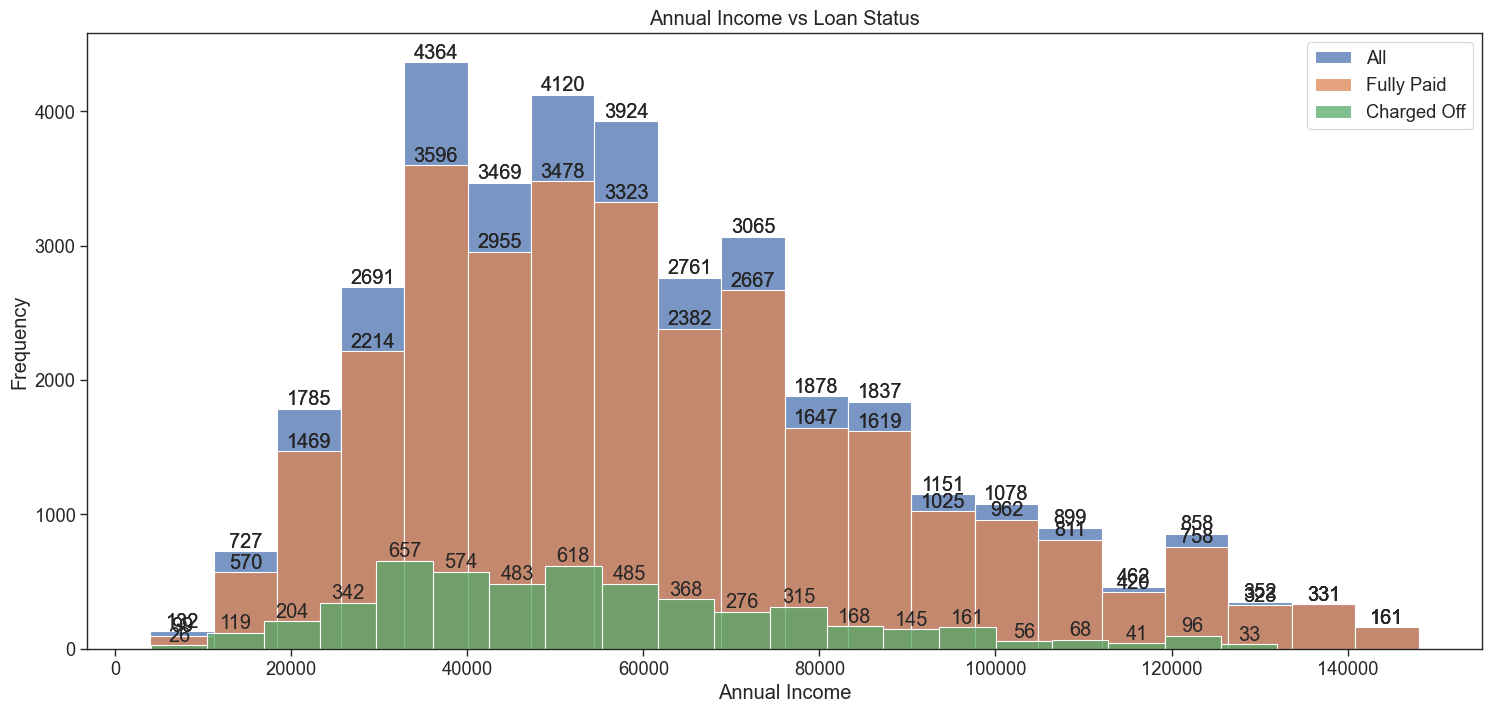

In [72]:
#Analyzing the Annual Income across different loan statuses
plt.figure(figsize=(18,8))
sns.histplot(final_data.annual_inc,bins= 20,  label='All')
for container in ax.containers:
    ax.bar_label(container)
ax1 = sns.histplot(final_data_fully_paid.annual_inc,bins= 20,  label='Fully Paid',)
for container in ax1.containers:
    ax1.bar_label(container)
ax2 = sns.histplot(final_data_charged_off.annual_inc,bins= 20,  label='Charged Off')
for container in ax2.containers:
    ax2.bar_label(container)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. We see that highest number of loan applicants are from 30,000 to 40,000 followed by 40000 to 50000
2. Proportion wise, we see that majority of loan write offs are for loan applicants having annual income between 35000 and 50000

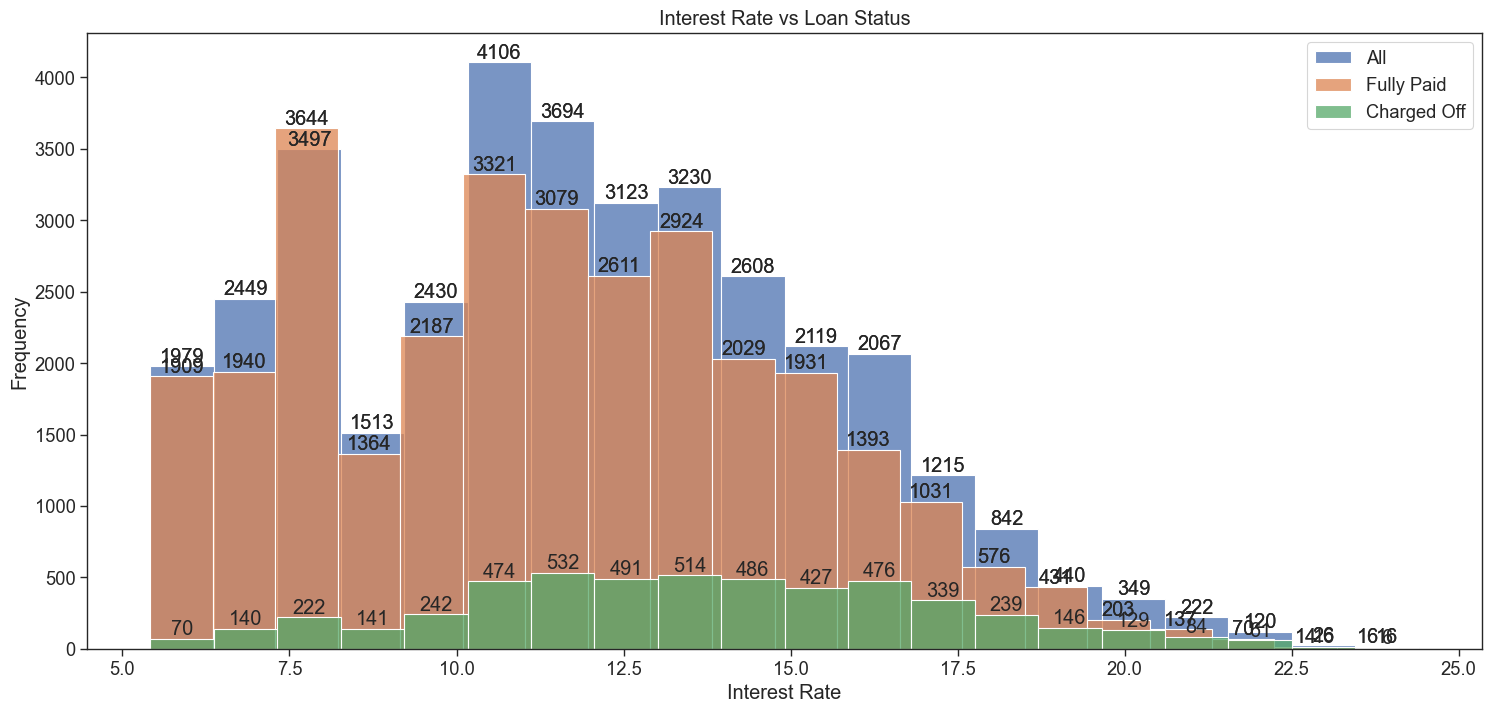

In [73]:
#Analyzing the interest rate across different loan statuses
plt.figure(figsize=(18,8))
sns.histplot(final_data.int_rate,bins= 20,  label='All')
ax1 = sns.histplot(final_data_fully_paid.int_rate,bins= 20,  label='Fully Paid',)
for container in ax1.containers:
    ax1.bar_label(container)
ax2 = sns.histplot(final_data_charged_off.int_rate,bins= 20,  label='Charged Off')
for container in ax2.containers:
    ax2.bar_label(container)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate vs Loan Status')
plt.legend()
plt.show()

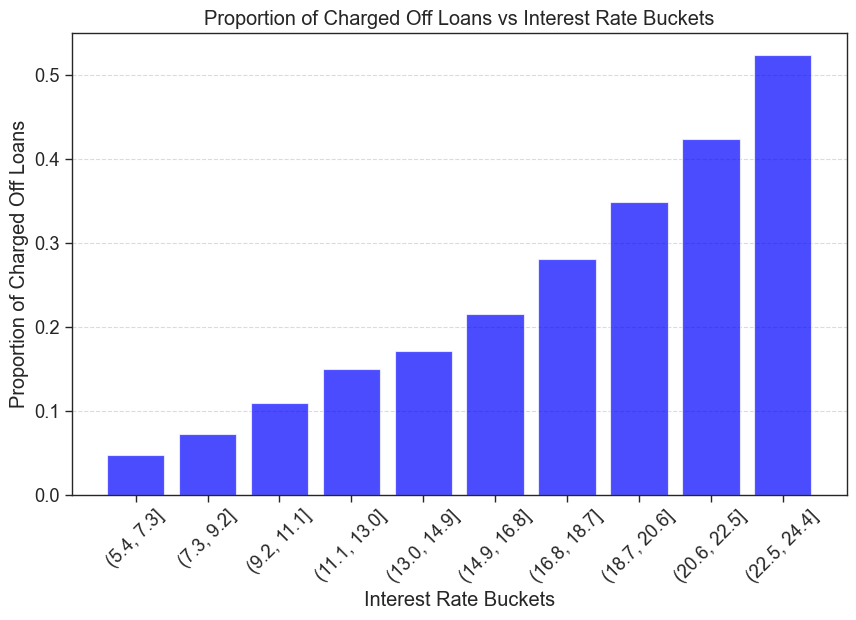

In [74]:
num_bins = 10

# Create bins for interest rates
bins = pd.cut(final_data['int_rate'], bins=num_bins, precision=1)

# Calculate the proportion of charged-off loans in each bin
charged_off_proportion = final_data_charged_off.groupby(bins)['int_rate'].count() / final_data.groupby(bins)['int_rate'].count()

# Convert the bin labels to strings for plotting
bin_labels = [str(b) for b in charged_off_proportion.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, charged_off_proportion, color='blue', alpha=0.7)
plt.xlabel('Interest Rate Buckets')
plt.ylabel('Proportion of Charged Off Loans')
plt.title('Proportion of Charged Off Loans vs Interest Rate Buckets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations**
1. Majority of the loan applicants are having interest rate between 10 and 15
2. Even though the data is small for applicants with high interest rate, proportion wise we are able to see that charged offs are increasing as the interest rate grows

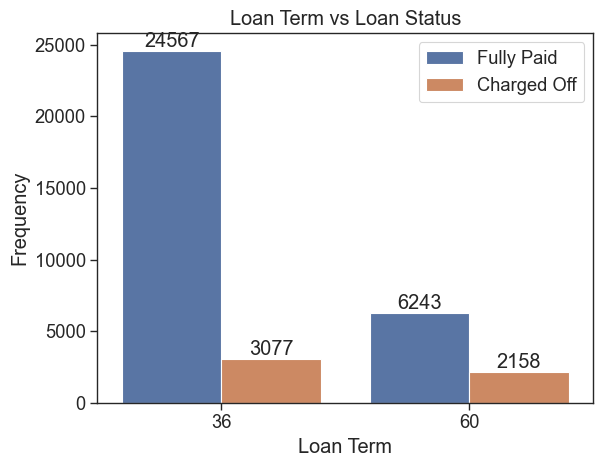

In [75]:
#Analyzing the loan term across different loan statuses
ax = sns.countplot(x = 'term', data=final_data, hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Loan Term')
plt.ylabel('Frequency')
plt.title('Loan Term vs Loan Status')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

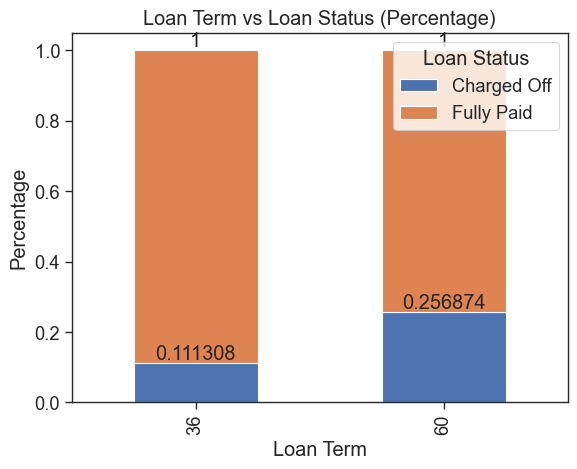

In [76]:
percentage_data = final_data.groupby(['term', 'loan_status']).size().unstack().div(final_data.groupby('term').size(), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 8))
ax = percentage_data.plot(kind='bar', stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Loan Term')
plt.ylabel('Percentage')
plt.title('Loan Term vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Observations**
1. Majority of the loan applicants have loan term as 36 months
2. However proportion wise, charged off data is significantly high in applicants who have loan term as 60 months

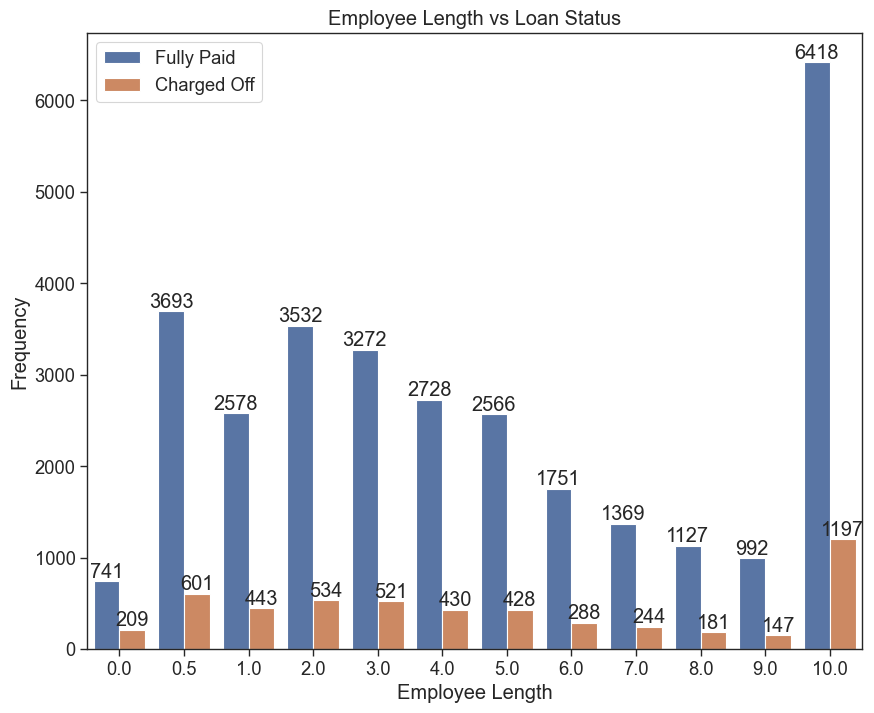

In [77]:
#Analyzing the emp length across different loan statuses
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'emp_length', data=final_data, hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.title('Employee Length vs Loan Status')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

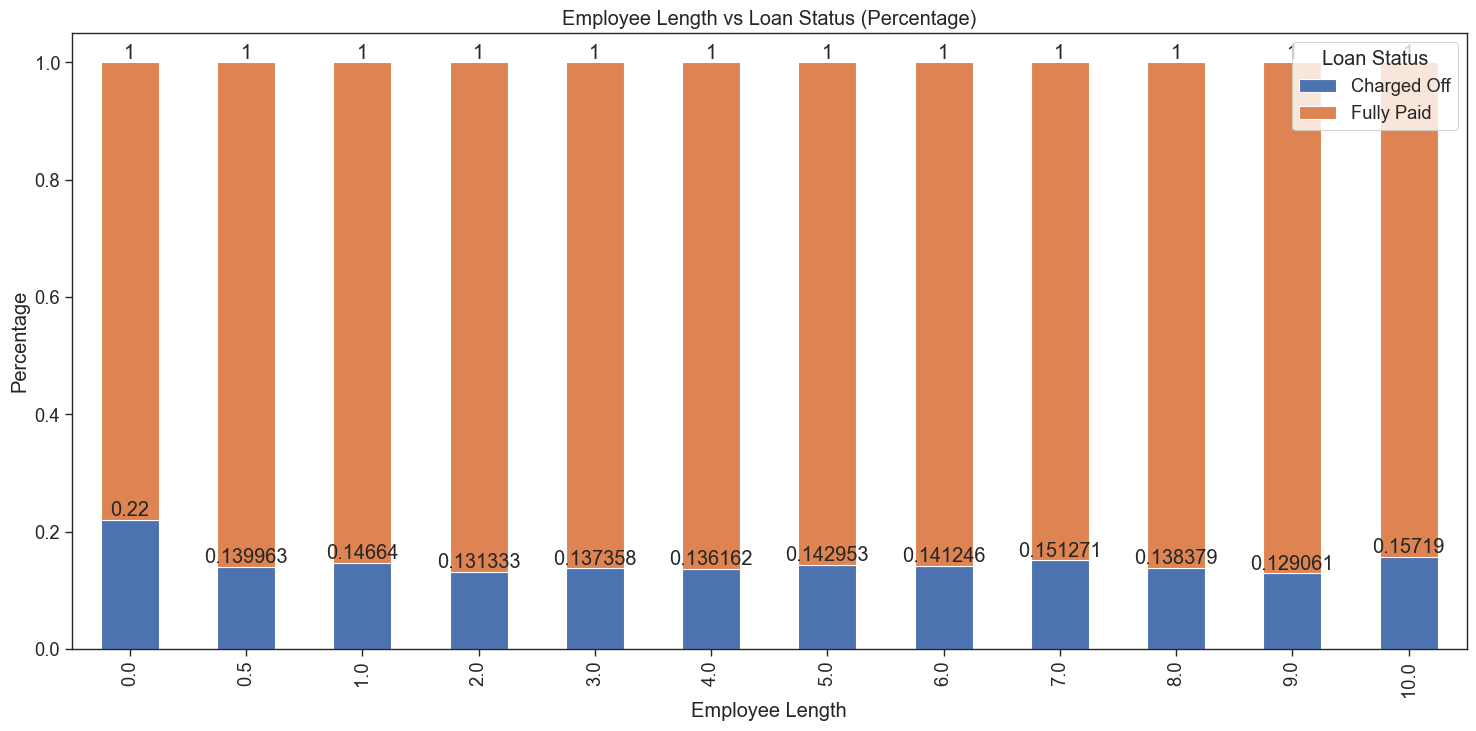

In [78]:
# Calculate the percentage of each loan status within each employee length
percentage_data = final_data.groupby(['emp_length', 'loan_status']).size().unstack().div(final_data.groupby('emp_length').size(), axis=0)

# Plot the stacked bar plot with percentages
plt.figure(figsize=(10, 8))
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(18,8))
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Employee Length')
plt.ylabel('Percentage')
plt.title('Employee Length vs Loan Status (Percentage)')
plt.legend(title='Loan Status')
plt.show()

**Observations**
1. More number of loan applicants have employee length as 10+ years
2. Proportion wise, we notice almost the same pattern across all employee lengths

**Analyzing year wise time series data across loan statuses**

In [79]:
#sns.lineplot?

In [80]:
#Observing the year wise summary data for each of the loan statuses
year_grouped = final_data.groupby(by='issue_d_year')['loan_status'].value_counts().reset_index(name='count')
year_grouped_df = year_grouped.reset_index(drop=True)
year_grouped_df.issue_d_year = year_grouped_df.issue_d_year.astype(str)
year_grouped_df

issue_d_year  loan_status  count
0         2007   Fully Paid    189
1         2007  Charged Off     40
2         2008   Fully Paid   1258
3         2008  Charged Off    237
4         2009   Fully Paid   3933
5         2009  Charged Off    560
6         2010   Fully Paid   9640
7         2010  Charged Off   1415
8         2011   Fully Paid  15790
9         2011  Charged Off   2983

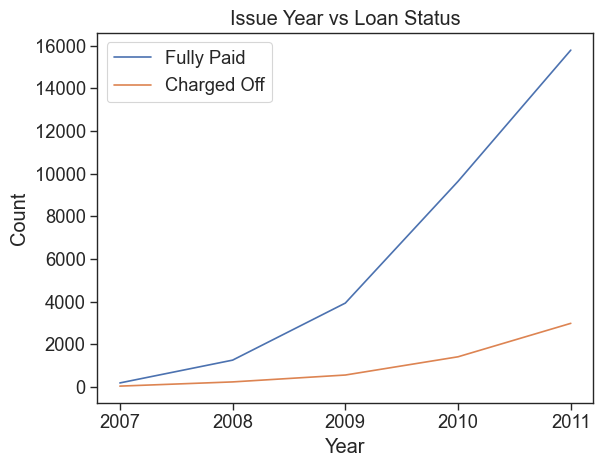

In [81]:
#Prepare the plot for issue year vs loan status
sns.lineplot(year_grouped_df[year_grouped_df.loan_status=='Fully Paid'], x="issue_d_year",y="count", label='Fully Paid')
sns.lineplot(year_grouped_df[year_grouped_df.loan_status=='Charged Off'], x="issue_d_year",y="count", label='Charged Off')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Issue Year vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. Loan applicants have significantly increased in 2011, there is year on year exponential increase in terms of overall loan applications
2. With respect to charged off data, it is almost same for the years 2007 to 2009. For years 2010 and 2011 it has increased significantly

**Analyzing month wise time series data across different loan statuses specifically for year 2011 as more loan applicants are from the year 2011**

In [82]:
#Creating month wise summary data for year 2011
data_2011 = final_data[final_data.issue_d_year == 2011]
month_grouped = final_data.groupby(by='issue_d_month')['loan_status'].value_counts().reset_index(name='count')
month_grouped_df = month_grouped.reset_index(drop=True)
month_grouped_df.issue_d_month = month_grouped_df.issue_d_month.astype(str)
month_grouped_df

issue_d_month  loan_status  count
0              1   Fully Paid   1964
1              1  Charged Off    307
2              2   Fully Paid   1957
3              2  Charged Off    272
4              3   Fully Paid   2198
5              3  Charged Off    321
6              4   Fully Paid   2313
7              4  Charged Off    345
8              5   Fully Paid   2317
9              5  Charged Off    437
10             6   Fully Paid   2513
11             6  Charged Off    447
12             7   Fully Paid   2706
13             7  Charged Off    443
14             8   Fully Paid   2714
15             8  Charged Off    437
16             9   Fully Paid   2703
17             9  Charged Off    516
18            10   Fully Paid   2918
19            10  Charged Off    523
20            11   Fully Paid   3182
21            11  Charged Off    551
22            12   Fully Paid   3325
23            12  Charged Off    636

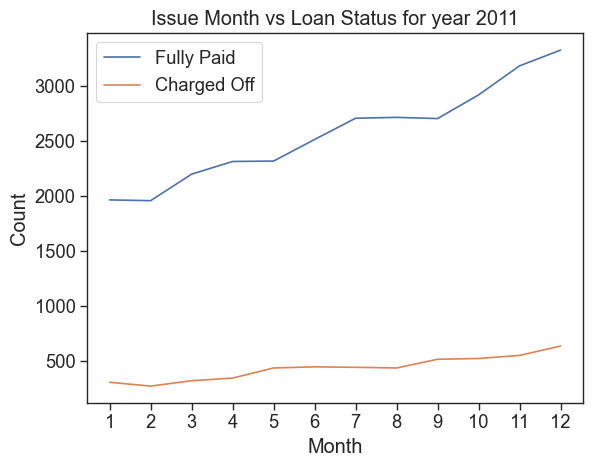

In [83]:
#Prepare the plot for issue month vs loan status for the year 2011
sns.lineplot(month_grouped_df[month_grouped_df.loan_status=='Fully Paid'], x="issue_d_month",y="count", label='Fully Paid')
sns.lineplot(month_grouped_df[month_grouped_df.loan_status=='Charged Off'], x="issue_d_month",y="count", label='Charged Off')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Issue Month vs Loan Status for year 2011')
plt.legend()
plt.show()

**Observations**
1. Loan applications data increased as the months are passing and it is significantly high by the end of the year
2. However charged off data is almost similar except that it is little high for the loans issued in December. Overall there is no much impact of the loan issued month

## Bivariate Analysis

**Over the next few steps, we will first analyze how numeric variables like annual income and loan amount are distributed across categorical variables like grade and loan status**

**1. Analyzing grade and average annual income across each loan status**

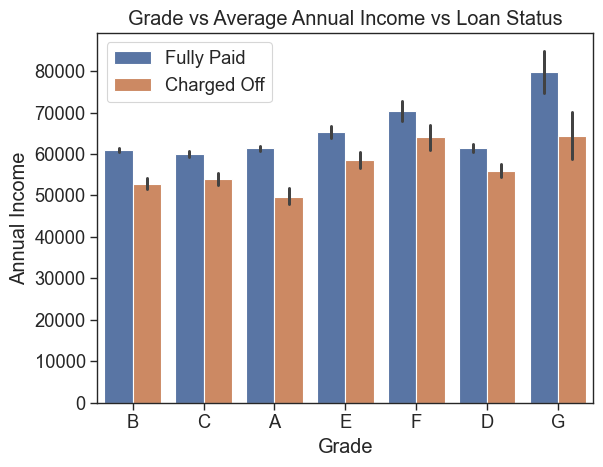

In [84]:
#Creating bar plot between loan_status, grade and average annual income
sns.barplot(data=final_data, x='grade', y='annual_inc', hue='loan_status', estimator=np.mean)
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.title('Grade vs Average Annual Income vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. Average annual income is higher for Grade 'G'
2. This makes sense as the risk increases from A to G, we tend to look for high annual income

**2. Analyzing grade and average loan amount across each loan status**

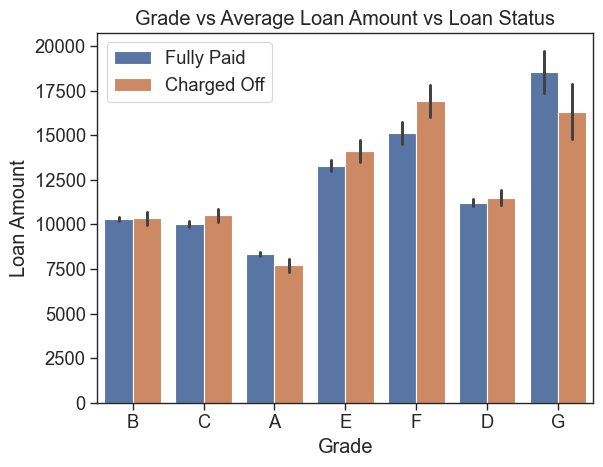

In [85]:
#Creating bar plot between loan_status, grade and average loan_amnt
sns.barplot(data=final_data, x='grade', y='loan_amnt', hue='loan_status', estimator=np.mean)
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Grade vs Average Loan Amount vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. Average loan amounts are high in 'F' followed by 'G' and 'E'

**3. Analyzing grade and median loan amount across each loan status**

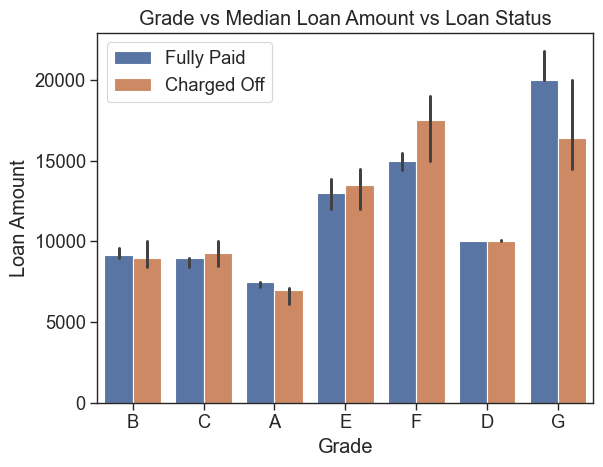

In [86]:
#Creating bar plot between loan_status, grade and median loan_amnt
sns.barplot(data=final_data, x='grade', y='loan_amnt', hue='loan_status', estimator=np.median)
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Grade vs Median Loan Amount vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. Even median loan amounts follow the same pattern and are high in 'F' followed by 'G' and 'E'

### Bivariate Analysis for numeric variables

**1. Analyzing all key numeric variables like annual income, loan amount, employee length and interest rate together**

In [87]:
#sns.pairplot?

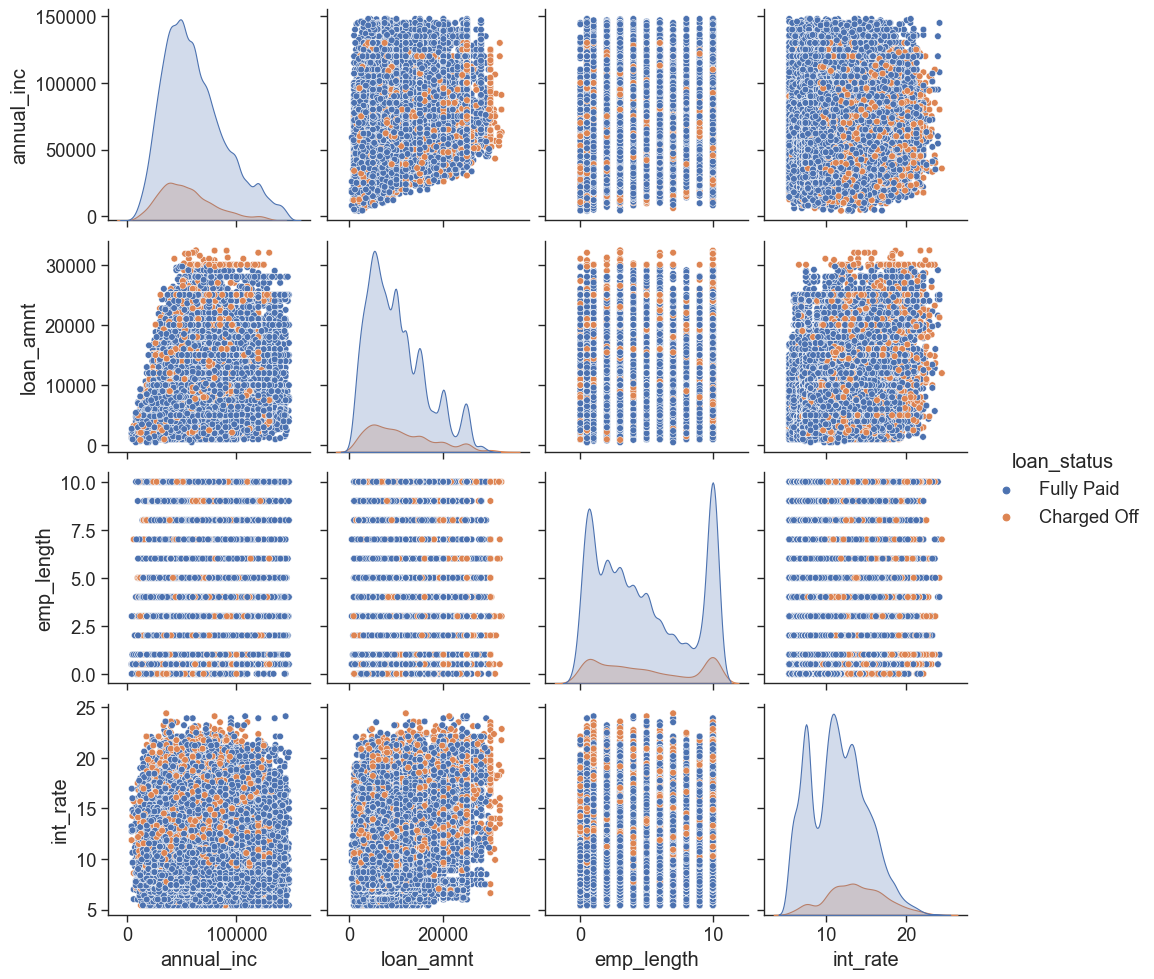

In [88]:
#Plot pair plot for all numeric variables
sns.pairplot(data=final_data, vars=['annual_inc','loan_amnt','emp_length','int_rate'], hue='loan_status', kind='scatter')
plt.show()

**2. Analyzing annual income vs loan amount for both the loan statuses**

In [89]:
#sns.scatterplot?

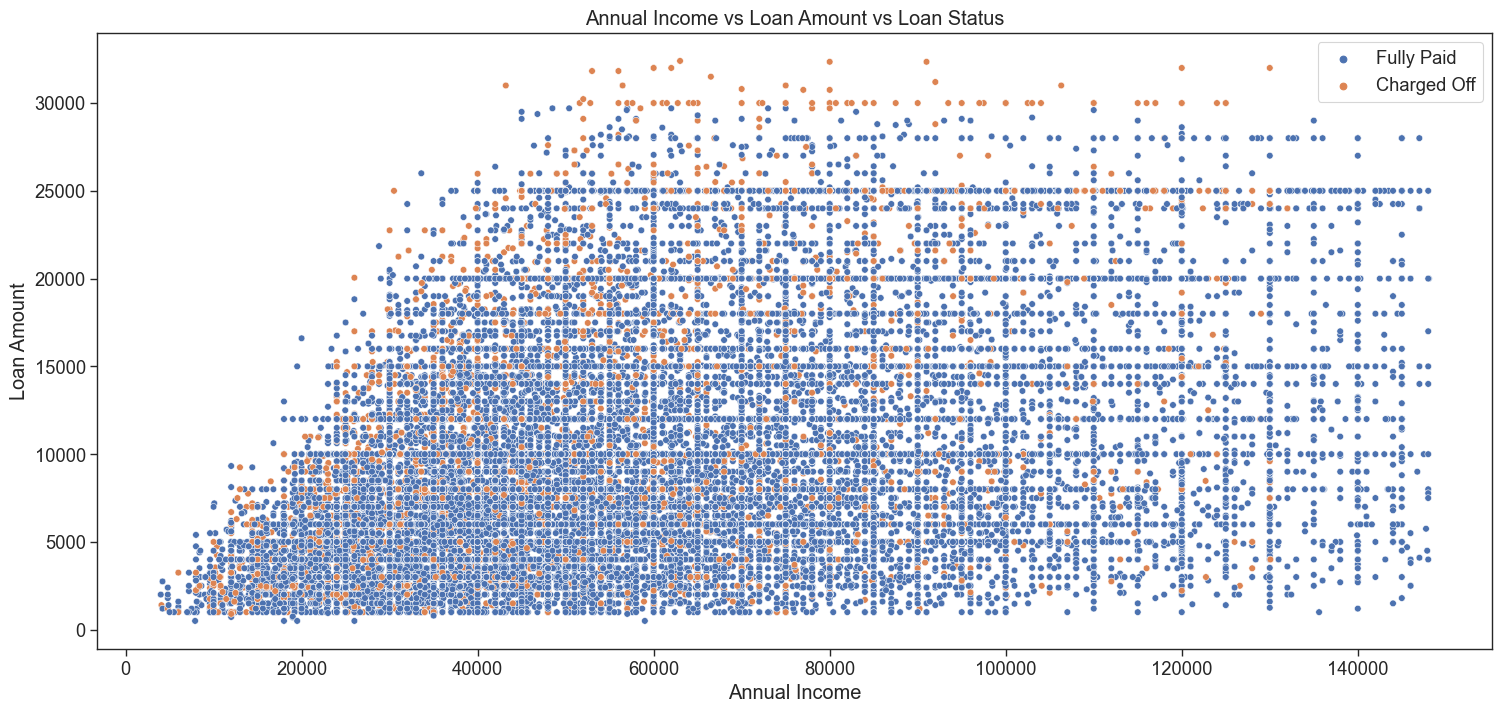

In [90]:
#Plotting scatter plot for annual income vs loan amount for both the loan statuses
plt.figure(figsize=(18,8))
sns.scatterplot(data=final_data, x="annual_inc", y="loan_amnt", hue='loan_status' )
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount vs Loan Status')
plt.legend()
plt.show()

**Observations**
1. We see that majority of charged off data is present in the lower annual income range

**3. Plotting only for annual income upto 50000 as majority of the loan applicants are in that range**

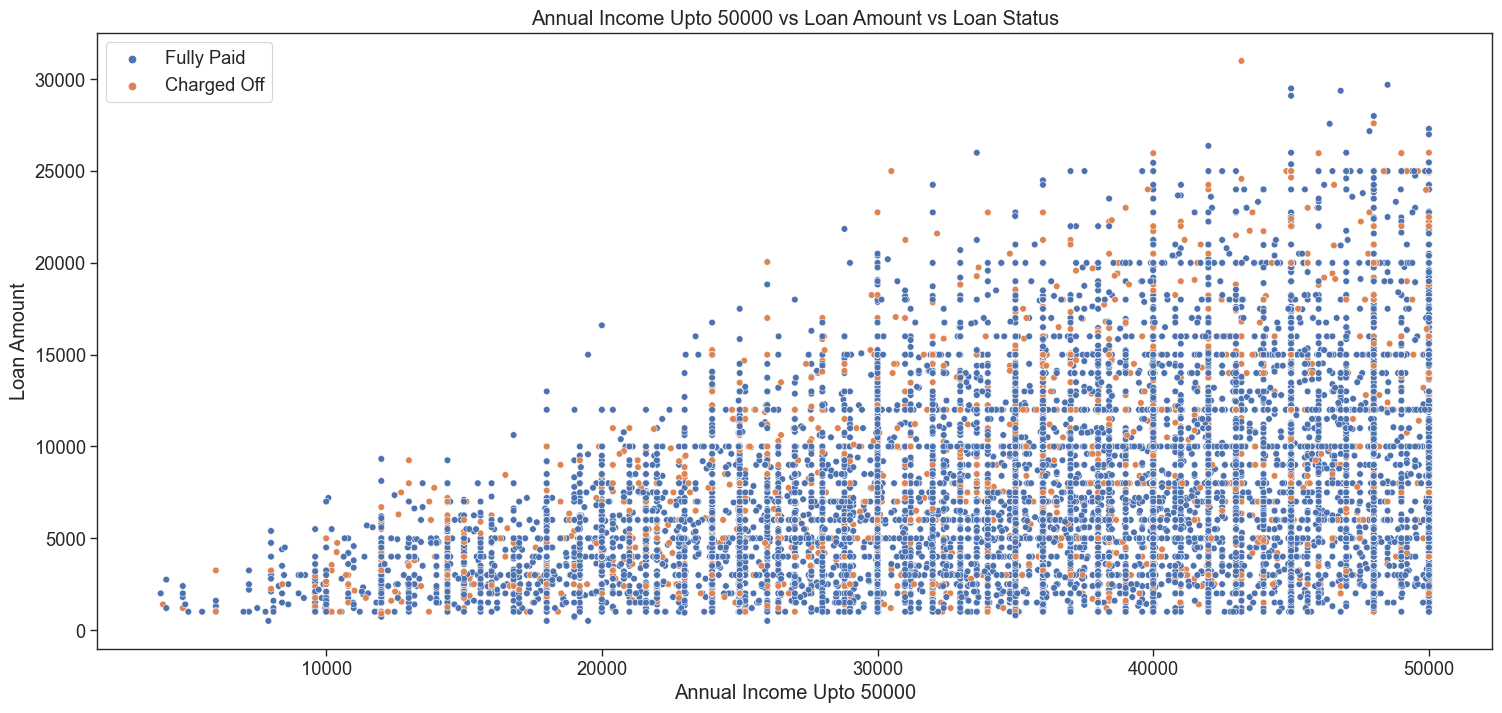

In [91]:
#Plotting scatter plot for annual income only upto 50000 vs loan amount for both the loan statuses
plt.figure(figsize=(18,8))
annual_inc_50k_data = final_data[final_data.annual_inc <= 50000]
sns.scatterplot(data=annual_inc_50k_data, x="annual_inc", y="loan_amnt", hue='loan_status' )
plt.xlabel('Annual Income Upto 50000')
plt.ylabel('Loan Amount')
plt.title('Annual Income Upto 50000 vs Loan Amount vs Loan Status')
plt.legend()
plt.show()

**4. Verifying the summary for key numeric variables in the overall data vs charged off data**

In [92]:
final_data[['loan_amnt','funded_amnt_inv','term','int_rate','emp_length','annual_inc']].describe()

loan_amnt  funded_amnt_inv          term      int_rate  \
count  36045.000000     36045.000000  36045.000000  36045.000000   
mean   10234.584547      9483.532160     41.593675     11.807358   
std     6333.762009      6065.983166     10.147012      3.618863   
min      500.000000         0.000000     36.000000      5.420000   
25%     5000.000000      4960.995085     36.000000      8.900000   
50%     9000.000000      8000.000000     36.000000     11.710000   
75%    14400.000000     12975.000000     36.000000     14.270000   
max    32400.000000     32350.000000     60.000000     24.400000   

         emp_length     annual_inc  
count  35990.000000   36045.000000  
mean       4.797749   60473.639291  
std        3.501937   27838.396577  
min        0.000000    4000.000000  
25%        2.000000   40000.000000  
50%        4.000000   55000.000000  
75%        8.000000   76000.000000  
max       10.000000  148080.000000

In [93]:
#Verifying summary for charged off data
final_data_charged_off[['loan_amnt','funded_amnt_inv','term','int_rate','emp_length','annual_inc']].describe()

loan_amnt  funded_amnt_inv         term     int_rate   emp_length  \
count   5235.000000      5235.000000  5235.000000  5235.000000  5223.000000   
mean   11185.382044     10054.960372    45.893410    13.664401     4.865307   
std     7044.135328      6670.323823    11.814776     3.594305     3.578696   
min      900.000000         0.000000    36.000000     5.420000     0.000000   
25%     5175.000000      4925.000000    36.000000    11.120000     2.000000   
50%    10000.000000      8700.000000    36.000000    13.490000     4.000000   
75%    15250.000000     14593.119825    60.000000    16.290000     9.000000   
max    32400.000000     32350.000000    60.000000    24.400000    10.000000   

          annual_inc  
count    5235.000000  
mean    54825.491767  
std     25055.359735  
min      4080.000000  
25%     36000.000000  
50%     50004.000000  
75%     70000.000000  
max    132000.000000

**5. Understand relation between loan amount, interest rate, annual income across grades for charged off data**

In [94]:
#Verifying the correlation between different numeric variables in the overall data
final_data[['loan_amnt','funded_amnt_inv','term','int_rate','emp_length','annual_inc']].corr()

loan_amnt  funded_amnt_inv      term  int_rate  emp_length  \
loan_amnt         1.000000         0.928626  0.313821  0.256268    0.143249   
funded_amnt_inv   0.928626         1.000000  0.319080  0.258733    0.153549   
term              0.313821         0.319080  1.000000  0.420309    0.096181   
int_rate          0.256268         0.258733  0.420309  1.000000   -0.001968   
emp_length        0.143249         0.153549  0.096181 -0.001968    1.000000   
annual_inc        0.372172         0.350329  0.052089  0.025711    0.203601   

                 annual_inc  
loan_amnt          0.372172  
funded_amnt_inv    0.350329  
term               0.052089  
int_rate           0.025711  
emp_length         0.203601  
annual_inc         1.000000

In [95]:
#Verifying the correlation between different numeric variables in the charged off data
final_data_charged_off[['loan_amnt','funded_amnt_inv','term','int_rate','emp_length','annual_inc']].corr()

loan_amnt  funded_amnt_inv      term  int_rate  emp_length  \
loan_amnt         1.000000         0.894293  0.367477  0.307584    0.199346   
funded_amnt_inv   0.894293         1.000000  0.410798  0.334255    0.203580   
term              0.367477         0.410798  1.000000  0.446102    0.137791   
int_rate          0.307584         0.334255  0.446102  1.000000    0.047823   
emp_length        0.199346         0.203580  0.137791  0.047823    1.000000   
annual_inc        0.430664         0.376814  0.107068  0.127421    0.234801   

                 annual_inc  
loan_amnt          0.430664  
funded_amnt_inv    0.376814  
term               0.107068  
int_rate           0.127421  
emp_length         0.234801  
annual_inc         1.000000

**Observations**
1. We don't see a strong correlation between the given numeric variables except loan amount and funded amount which are almost same

**6. Charged off data - Compare median loan amounts across categories of annual income buckets and grade**

In [96]:
# Analyzing grade, annual income bucket & loan amounts for charged off data

##Create a pivot table for annual income bucket and grade with values set to loan amounts
res_loan_amnt = pd.pivot_table(data=final_data_charged_off, index="grade", columns="annual_inc_bucket", values="loan_amnt", aggfunc=np.median)
res_loan_amnt

annual_inc_bucket       VL        L        M        H       VH
grade                                                         
A                   5787.5   6612.5   8500.0   9000.0   8450.0
B                   6000.0   8875.0  10000.0  12000.0  14700.0
C                   6000.0   9000.0  10000.0  12000.0  14400.0
D                   6000.0   9600.0  10900.0  14900.0  15250.0
E                   6725.0  12000.0  16000.0  15425.0  21425.0
F                   7412.5  14000.0  19500.0  20000.0  24000.0
G                  10000.0  13650.0  15250.0  20000.0  21800.0

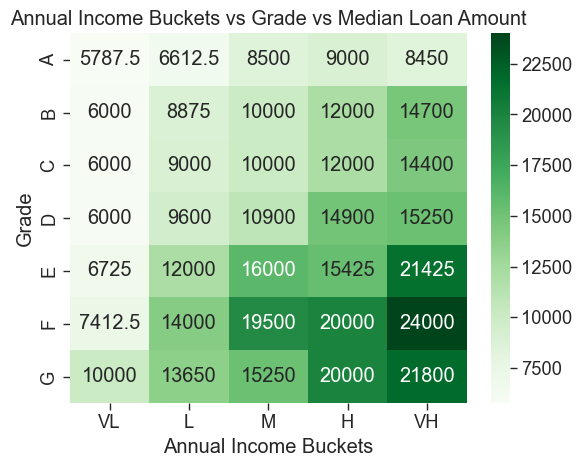

In [97]:
# Plot a heatmap for the above one
sns.heatmap(res_loan_amnt, cmap = "Greens", annot=True,fmt='g')
plt.ylabel('Grade')
plt.xlabel('Annual Income Buckets')
plt.title('Annual Income Buckets vs Grade vs Median Loan Amount')
plt.show()

**Observations**
1. We see median loan amounts for the charged off data across different annual income buckets and different grades.
2. We see more density in charged off data for the loan amounts 19,000 to 24, 000 across three different annual income buckets and that is for grades 'E', 'F' and 'G'

**7. Charged off data - Compare median annual income across categories of loan amount buckets and grade**

In [98]:
# Analyzing grade, loan amount bucket & annual incomes for charged off data

##Create a pivot table for loan amount bucket and grade with values set to annual incomes
res_ann_inc = pd.pivot_table(data=final_data_charged_off, index="grade", columns="loan_amnt_bucket", values="annual_inc", aggfunc=np.median)
res_ann_inc

loan_amnt_bucket       VL        L        M        H       VH
grade                                                        
A                 39660.0  42750.0  50000.0  51500.0  62000.0
B                 39000.0  42807.0  46000.0  53500.0  60998.0
C                 40000.0  45000.0  50000.0  49632.0  60720.0
D                 35244.0  41760.0  50000.0  54000.0  65066.5
E                 37600.0  47500.0  45547.5  54000.0  64480.0
F                 48996.0  38250.0  48500.0  60000.0  70000.0
G                 42799.5  50000.0  50000.0  40000.0  76500.0

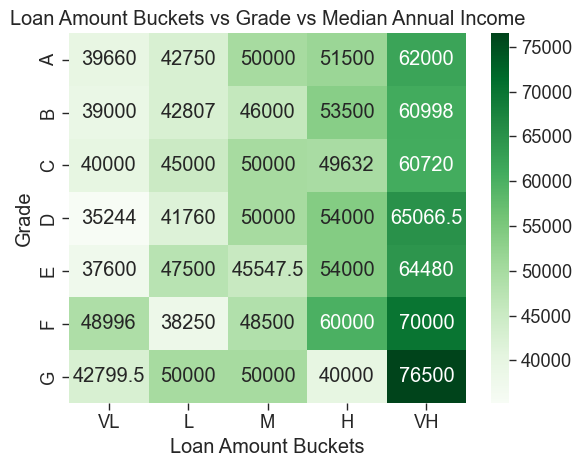

In [99]:
# Plot a heatmap for the above one
sns.heatmap(res_ann_inc, cmap = "Greens", annot=True,fmt='g')
plt.ylabel('Grade')
plt.xlabel('Loan Amount Buckets')
plt.title('Loan Amount Buckets vs Grade vs Median Annual Income')
plt.show()

**Observations**
1. We see that median annual income is increasing with Grade as it signifies that we tend to look for more annual income as the risk grade increases